# Auswirkungen der Datenbalance auf die Qualität einer Gesichtsmaskenerkennung

### Modul Machine Learning, M.Sc. Angewandte KI, 07/2022

# Kurzfassung

Als Grundlage in dieser Ausarbeitung dient der auf der Plattform Kaggle verfügbare Datensatz "Face Mask Detection". Es wird festgestellt, dass die Daten ungleich auf die Klassen verteilt sind und daher eine unbalancierte Datengrundlage vorhanden ist. Zur Beurteilung der Auswirkungen dieser Unausgewogenheit auf die Qualität einer Gesichtsmaskenerkennung werden zunächst ein Decision Tree sowie Random Forest mit den Daten trainiert. Zum Vergleich wird das Training nach einem Under- sowie Over-Sampling der Daten erneut durchgeführt. Es kann gezeigt werden, dass die Unterscheidung zwischen einer korrekt und einer falsch getragenen Maske durch die Datentransformation verbessert wird. Zusätzlich sind die negativen Auswirkungen unbalancierter Daten erkennbar. 

# Inhaltsverzeichnis

1. [Einleitung](#einleitung)<br>
2. [Vorbereitungen](#vorbereitungen)<br>
3. [Datenextraktion](#datenextraktion)<br>
4. [Datentransformation](#datentransformation)<br>
5. [Datenanalyse](#datenanalyse)<br>
6. [Datensätze splitten](#datensätze_splitten)<br>
    6.1 [Unbalancierte Daten](#unbalanced)<br>
    6.2 [Under-Sampling Daten](#under-sampled)<br>
    6.3 [Over-Sampling Daten](#over-sampled)<br>
7. [Maschinelles Lernen](#ml)<br>
    7.1 [Decision Tree](#dt)<br>
    7.1.1 [Unbalancierte Daten](#dt_unbalanced)<br>
    7.1.2 [Under-Sampling Daten](#dt_under-sampled)<br>
    7.1.3 [Over-Sampling Daten](#dt_over-sampled)<br>
    7.2 [Random Forrest](#rf)<br>
    7.2.1 [Unbalancierte Daten](#rf_unbalanced)<br>
    7.2.2 [Under-Sampling Daten](#rf_under-sampled)<br>
    7.2.3 [Over-Sampling Daten](#rf_over-sampled)<br>
8. [Evaluation der Ergebnisse](#evaluation)<br>
9. [Fazit und Ausblick](#ausblick)<br>
10. [Literaturverzeichnis](#literatur)<br>

<a name="einleitung"></a>
## 1. Einleitung

Durch eine Gesichtsmaskenerkennung soll es möglich sein automatisch festzustellen, ob Personen auf einem Foto eine Maske tragen und falls ja, ob diese korrekt getragen wird. Technisch realisiert wird dies durch Computer Vision (zu Deutsch: computerbasiertes Sehen), welches es ermöglicht, aufgenomme Fotos auf unterschiedlichste Arten zu Verarbeiten und zu Analysieren, um aussagekräftige Informationen zu gewinnen und den Inhalt zu verstehen. Computer Vision ermöglicht im Bereich des Maschinellen Lernens also dem Computer, menschliches Sehvermögen nachzuempfinden. [8]<br><br>
Computer Vision hat in den letzten Jahren sehr große Erfolge im Bereich des maschinellen Lernen erzielt. Eine Besonderheit bei der Verarbeitung von Fotodaten stellt dar, dass die vorhandenen Pixel zunächst in nummerische Daten umgewandelt werden müssen, damit diese durch Algorithmen des maschinellen Lernens verarbeitet werden können.<br><br>
Als Datengrundlage für diese Ausarbeitung dient der auf der Plattform Kaggle verfügbare Datensatz "Face Mask Detection", welcher vom dortigen Nutzer "LARXEL" vor etwa 2 Jahren veröffentlich wurde. Zum Zeitpunkt der Erstellung dieser Ausarbeitung wurde der Datensatz bereits mehr als 400.000 mal angesehen sowie knapp 45.000 mal gedownloadet.<br><br>
Für eine erfolgreiche Umsetzung einer Gesichtsmaskenerkennung ist von Bedeutung, dass diese unterscheiden kann, ob eine Person eine Maske trägt oder nicht. Zusätzlich ist auch von großer Bedeutung zu erkennen, ob eine Person, welche eine Maske trägt, die Maske auch korrekt trägt, da andernfalls der gewünschte Effekt einer getragenen Maske nicht erzielt wird. Daher differenziert der verwendete Datensatz auch in genau diese drei Kategorien.<br>
Ziel dieser Ausarbeitung ist zu evaluieren, inwiefern die vorliegende Datengrundlage zum Training eines Algorithmus des maschinellen Lernens geeignet ist. Hierbei ist vor allem von Bedeutung, ob die Daten in ausbalancierter Form vorhanden sind und welche Metriken zur Bewertung herangezogen werden müssen um festzustellen, ob ein erfolgreiches Modell zur Klassifikation aller drei Kategorien entwickelt werden kann.<br>
Die Kapitel 2 bis 5 dieser Ausarbeitung dienen dabei der Vorbereitung und Analyse der Daten für die spätere Verwendung in den maschinellen Lernverfahren. Dazu werden zunächst die Daten extrahiert und anschließend transformiert, bevor eine Analyse sowie Visualisierung der Ergebnisse in Diagrammen erfolgt.<br>
In Kapitel 6 werden die Daten auf Basis der zuvor in der Analyse gewonnenen Kenntnisse in mehrere Datensätze gesplittet. Neben den Datensätzen für die Original-Daten erfolgt hierbei die Generierung weiterer Datensätze im Rahmen des Under- sowie Over-Sampling.<br>
Kapitel 7 dreht sich um die maschinellen Lernverfahren Decision Tree und Random Forest. Die zuvor erzeugten Datensätze werden hier mit jeweils einem Algorithmus trainiert und daraus verschiedene Messwerte ermittelt, sodass insgesamt 6 Modelle existieren.<br>
Kapitel 8 beeinhaltet die Analyse bzw. Evaluation der verschiedenen Modelle anhand der in Kapitel 7 ermittelten Messwerte. Zum besseren Verständnis erfolgt die Darstellung in Diagrammen sowie Korrelationsmatrizen.<br>
Im letzten Kapitel 9 wird anschließend das Fazit gezogen sowie ein kurzer Ausblick auf mögliche Optimierungen gegeben.

<a name="vorbereitungen"></a>
## 2. Vorbereitungen

Wie bereits zuvor erwähnt stammen die in dieser Ausarbeitung verwendeten Daten von der Data Science-Plattform Kaggle. <br>
Die Daten unterteilen sich in den Ordner `Source/images`, in welchem sich die Bilddateien befinden, und den Ordner `Source/annotations`, welcher die Annotationen zu den Bilddateien enthält.<br>
Insgesamt sind 853 Datensätze vorhanden - das bedeutet, dass in beiden genannten Ordnern jeweils 853 Dateien vorhanden sind, da jeder Bilddatei (.png) eine Annotationsdatei (.xml) zugehörig ist.<br>
Die XML-Dateien enthalten Informationen zur Objekterkennung und sind im sogenannten PASCAL VOC Format (VOC: Visual Object Classes) gespeichert. Durch PASCAL VOC ist es möglich, sogenannte Bounding Boxes zu speichern. Diese bestehen aus Koordinaten, um die genaue Position eines Objektes im Bild zu beschreiben, sowie aus einem Label, welches das Objekt einer Kategorie zuordnet.<br>
Im Datensatz sind folgende Label zur Klassifizierung vorhanden:
- `with_mask`: beschreibt Objekte, die eine Maske korrekt tragen
- `mask_weared_incorrect`: beschreibt Objekte, die zwar eine Maske tragen, jedoch nicht korrekt
- `without_mask` : beschreibt Objekte, die keine Maske tragen

Bevor mit der Ausarbeitung begonnen werden kann ist es notwendig, grundlegende erforderliche Module zu importieren.<br>
Es werden sowohl Module zur Datenverarbeitung (numpy, pandas) und für die Bildverarbeitung (cv2, matplotlib) importiert, als auch Module zur Verarbeitung von XML-Daten und zur Nutzung von Betriebssystemfunktionen (os).

In [1]:
import xmltodict
import xml.etree.ElementTree as ET
import os
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

Wie bereits erwähnt befinden sich die zur Verfügung stehenden Daten in zwei Unterordnern des Ordners `Source`:
- Annotations
- Images

Zur weiteren Verarbeitung werden die jeweiligen Dateinamen aus dem Verzeichnis geladen und in zwei Listen gespeichert.

In [2]:
annotations='Source/annotations/'
images='Source/images/'

In [3]:
annotation_files = os.listdir(annotations)
images_files = os.listdir(images)
shape_files = len(annotation_files), len(images_files)

In [4]:
annotation_files[:3], images_files[:3]

(['maksssksksss0.xml', 'maksssksksss1.xml', 'maksssksksss10.xml'],
 ['maksssksksss0.png', 'maksssksksss1.png', 'maksssksksss10.png'])

Die Shape dient der Kontrolle, ob alle Dateinamen vollständig eingelesen wurden. Da beide Listen jeweils 853 Einträge enthalten, war der Import erfolgreich.

In [5]:
shape_files

(853, 853)

<a name="datenextraktion"></a>
## 3. Datenextraktion

Da die Daten zu den Annotationen im XML-Format gespeichert sind ist es zunächst erforderlich, entsprechende Informationen aus diesem Format zu extrahieren. <br>
Von Relevanz sind hierbei zunächst allgemeine Daten, die das zugehörige .png-Bild beschreiben, also der Dateiname sowie Höhe und Breite des Bildes. Weiterhin ist es sinnvoll, die Informationen aus den vorhandenen Bounding Boxes auszulesen - hier sind neben dem Label auch die jeweiligen Koordinaten von Interesse.<br>
Um die Daten zu speichern, wird zunächst ein Dictionary angelegt. Anschließend durchläuft eine for-Schleife alle Annotations-Dateien, extrahiert die erforderlichen Informationen und speichert diese im Dictionary.

In [6]:
data = {'file': [], 'width': [], 'height': [], 'label': [], 'xmin': [], 'ymin': [], 'xmax': [], 'ymax': []}

In [7]:
for file in annotation_files:
    file_path = annotations+file
    xml_tree = ET.parse(file_path)
    root = xml_tree.getroot() 
    
    for child in root:
        if child.tag == 'object':
            data['file'].append(root.find('filename').text.split('.')[0])
            data['width'].append(root.find('size/width').text)         
            data['height'].append(root.find('size/height').text)            
            data['label'].append(child.find('name').text)            
            data['xmin'].append(child.find('bndbox/xmin').text)            
            data['ymin'].append(child.find('bndbox/ymin').text)            
            data['xmax'].append(child.find('bndbox/xmax').text)
            data['ymax'].append(child.find('bndbox/ymax').text)

Zur einfacheren Handhabung wird das Dictionary in ein DataFrame-Objekt umgewandelt und zudem die Bezeichnung für .png- und .xml-Datei des jeweiligen Datensatzes ergänzt.<br>
Ein Auszug aus dem DataFrame ist folgend dargestellt. Hier ist erkennbar, dass insgesamt 4072 Zeilen vorhanden sind, was bedeutet, dass 4072 Bounding Boxes, also 4072 Objekte, im Datensatz detektiert wurden.<br>
Die ersten drei Datensätze enthalten beispielsweise als File alle den Eintrag `maksssksksss0`, was darauf schließen lässt, dass dieses Foto zumindest drei Objekte enthält.

In [8]:
dfData = pd.DataFrame(data)
dfData['file_image'] = dfData['file']+'.png'
dfData['file_annotation'] = dfData['file']+'.xml'

In [9]:
dfData

,file,width,height,label,xmin,ymin,xmax,ymax,file_image,file_annotation
0,maksssksksss0,512,366,without_mask,79,105,109,142,maksssksksss0.png,maksssksksss0.xml
1,maksssksksss0,512,366,with_mask,185,100,226,144,maksssksksss0.png,maksssksksss0.xml
2,maksssksksss0,512,366,without_mask,325,90,360,141,maksssksksss0.png,maksssksksss0.xml
3,maksssksksss1,400,156,with_mask,321,34,354,69,maksssksksss1.png,maksssksksss1.xml
4,maksssksksss1,400,156,with_mask,224,38,261,73,maksssksksss1.png,maksssksksss1.xml
...,...,...,...,...,...,...,...,...,...,...
4067,maksssksksss98,400,267,with_mask,263,62,287,85,maksssksksss98.png,maksssksksss98.xml
4068,maksssksksss98,400,267,with_mask,344,80,377,106,maksssksksss98.png,maksssksksss98.xml
4069,maksssksksss99,400,267,mask_weared_incorrect,181,54,273,162,maksssksksss99.png,maksssksksss99.xml
4070,maksssksksss99,400,267,with_mask,99,87,176,165,maksssksksss99.png,maksssksksss99.xml


Zur Überprüfung wird nun die zugehörige .png-Datei des ersten Datensatzes eingelesen und anschließend dargestellt. <br>
Zu beachten ist, dass das Modul CV2 grundsätzlich mit BGR-Farbkanälen arbeitet, was eine Umkonvertierung in das RGB-Format erforderlich macht.<br>
Das Objekt `im` beeinhaltet zu jedem einzelnen Pixel die jeweiligen RGB-Werte als Arrays.<br><br>
Wie erhofft ist erkennbar, dass drei Personen auf dem Bild vorhanden sind und somit für drei Objekte Bounding-Boxes existieren  müssen.

In [10]:
im = cv2.imread(images+images_files[0])
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

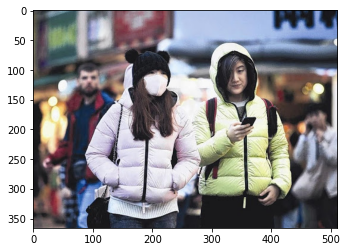

In [11]:
plt.imshow(im)

Beispielhaft wird nun eine Bounding-Box dargestellt. In diesem Fall ist dies die Bounding-Box des dritten Datensatzes, welche zum oben dargestellten Bild `maksssksksss0`gehört.<br>
Dazu werden die jeweiligen max/min-Koordinaten in X und Y Richtung an das vorherige Bild übergeben und ein Ausschnitt aus diesem gebildet.<br>

In [12]:
xmin=int(dfData['xmin'].iloc[2])
ymin=int(dfData['ymin'].iloc[2])
xmax=int(dfData['xmax'].iloc[2])
ymax=int(dfData['ymax'].iloc[2])

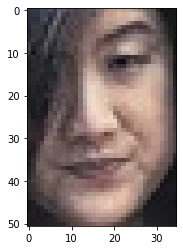

In [13]:
im2 = im[ymin:ymax,xmin:xmax]
plt.imshow(im2)

<a name="datentransformation"></a>
## 4. Datentransformation

Das Ziel der verwendeten ML-Modelle ist die Vorhersage, ob ein Objekt auf einem Bild eine Maske trägt und falls ja, ob diese korrekt getragen wird.<br> 
Für das spätere Training der Algorithmen ist es daher erforderlich, die Objekte durch ihre jeweiligen Bounding Boxes aus den Bildern zur extrahieren und in separate .png-Dateien zu transformieren.<br>
Dazu wird zunächst eine neue Spalte im DataFrame ergänzt, welche eine Kombination aus Filename und der Bounding-Box-ID enthält.<br>
Zur Prüfung ist das DataFrame folgend nochmals dargestellt.

In [14]:
dfData['image_bb'] = dfData['file']+'_'+dfData.index.map(str)+'.png'

In [15]:
dfData

,file,width,height,label,xmin,ymin,xmax,ymax,file_image,file_annotation,image_bb
0,maksssksksss0,512,366,without_mask,79,105,109,142,maksssksksss0.png,maksssksksss0.xml,maksssksksss0_0.png
1,maksssksksss0,512,366,with_mask,185,100,226,144,maksssksksss0.png,maksssksksss0.xml,maksssksksss0_1.png
2,maksssksksss0,512,366,without_mask,325,90,360,141,maksssksksss0.png,maksssksksss0.xml,maksssksksss0_2.png
3,maksssksksss1,400,156,with_mask,321,34,354,69,maksssksksss1.png,maksssksksss1.xml,maksssksksss1_3.png
4,maksssksksss1,400,156,with_mask,224,38,261,73,maksssksksss1.png,maksssksksss1.xml,maksssksksss1_4.png
...,...,...,...,...,...,...,...,...,...,...,...
4067,maksssksksss98,400,267,with_mask,263,62,287,85,maksssksksss98.png,maksssksksss98.xml,maksssksksss98_4067.png
4068,maksssksksss98,400,267,with_mask,344,80,377,106,maksssksksss98.png,maksssksksss98.xml,maksssksksss98_4068.png
4069,maksssksksss99,400,267,mask_weared_incorrect,181,54,273,162,maksssksksss99.png,maksssksksss99.xml,maksssksksss99_4069.png
4070,maksssksksss99,400,267,with_mask,99,87,176,165,maksssksksss99.png,maksssksksss99.xml,maksssksksss99_4070.png


Im nächsten Schritt erfolgt nun das Erzeugen der neuen .png-Dateien, welche aus den Bounding-Boxes bestehen. <br>
Die for-Schleife durchläuft das gesamte DataFrame und legt für jeden Datensatz entsprechend eine Bilddatei an, die als Filename den zuvor erzeugten Wert aus der Spalte `image_bb` erhält.<br>
Gespeichert werden die Dateien im Ordner `Source/images_bb`.

In [16]:
for i in dfData.index:
    file_path = images+dfData['file_image'].iloc[i] 
    im = cv2.imread(file_path)     
    xmin = int(dfData['xmin'].iloc[i])
    ymin = int(dfData['ymin'].iloc[i])
    xmax = int(dfData['xmax'].iloc[i])
    ymax = int(dfData['ymax'].iloc[i]) 
    image_bb = dfData['image_bb'].iloc[i]    
    im_bb = im[ymin:ymax,xmin:xmax]    
    path_bb = 'Source/images_bb/'    
    cv2.imwrite(os.path.join(path_bb,image_bb),im_bb)

Zur Überprüfung der for-Schleife wird die Anzahl der Dateien angegeben, die sich im Ordner `Source/images_bb` befinden.<br>
Da insgesamt 4072 Dateien vorhanden sind, wurde für alle Zeilen, also für alle Bounding-Boxes, eine .png-Datei erzeugt.

In [17]:
len(os.listdir('Source/images_bb'))

4072

Exemplarisch wird zur Prüfung der Bilddateien der zweite Datensatz ausgewählt und das zugehörige Bounding-Box-Bild dargestellt.

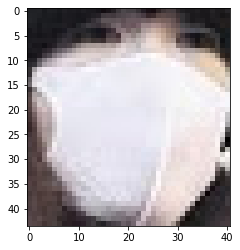

In [18]:
file_path = 'Source/images_bb/'+dfData['image_bb'].iloc[1] 
im = cv2.imread(file_path) 
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)

<a name="datenanalyse"></a>
## 5. Datenanalyse

Da die Daten nun strukturiert vorliegen ist es sinnvoll, zunächst eine kurze Analyse durchzuführen.<br>
Ein wichtiger Punkt ist zu überprüfen, wie häufig unterschiedliche Datensätze vorhanden sind - oder anders gesagt, ob die Daten "ausbalanciert" sind, d.h. in etwa auf alle Klassen ähnlich häufig verteilt.<br>
Im Folgenden Diagramm ist zu sehen, dass der Großteil der Daten dem Label `with_mask` zugehörig ist, während zu anderen Labels, vor allem `mask_weared_incorrect`, vergleichsweise wenig Daten vorliegen.<br>
Dies bringt die Gefahr mit sich, dass spätere ML-Modelle zwar ingesamt eine hohe Genauigkeit aufweisen, bezogen auf die unterrepräsentierten Klassen die Genauigkeit jedoch stark sinkt, da nicht ausreichend Daten für ein erfolgreiches Training vorhanden sind.<br>
Je nach Anwendungsfall ist dieses Problem vernachlässigbar. Für die Anwendung einer Gesichtsmaskenerkennung kann dies jedoch problematisch sein. Zwar können vermutlich nach dem Training der Modelle korrekt getragene Masken sehr gut erkannt werden, es ist allerdings ebenso wichtig zu erkennen, ob eine Maske falsch oder garnicht getragen wird.

In [19]:
sum_labels = {'with_mask': 0 , 'without_mask': 0, 'mask_weared_incorrect': 0}
for i in dfData.index:
    if dfData['label'].iloc[i] == 'with_mask':
        sum_labels['with_mask'] += 1
    if dfData['label'].iloc[i] == 'without_mask':
        sum_labels['without_mask'] += 1
    if dfData['label'].iloc[i] == 'mask_weared_incorrect':
        sum_labels['mask_weared_incorrect'] += 1

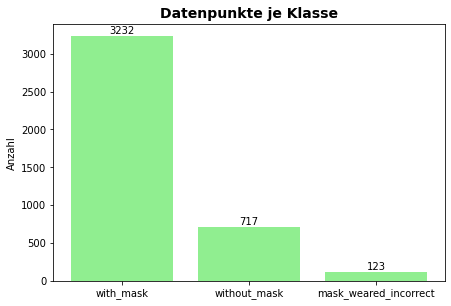

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))
fig.tight_layout(pad=0.5, w_pad=2.0, h_pad=3.0)

bar_labels = ax.bar(*zip(*sum_labels.items()), color = 'lightgreen')
ax.set_ylabel("Anzahl")
ax.set_title("Datenpunkte je Klasse", fontsize = 14, fontweight = 'bold')
ax.bar_label(bar_labels)

plt.show()

Zur erfolgreichen Konstruktion von Modellen des maschinellen Lernens müssen weiterhin vereinzelte Parameter über den gesamten Datensatz homogen sein. Dies betrifft beispielsweise die Shape der Daten.<br>
Da alle Bilddateien unterschiedliche Größen aufweisen wird daher der Median der Höhe bzw. der Median der Breite aller Bilder ermittelt. Dadurch ist es möglich eine passende Shape zu definieren, auf die alle Bilddaten dimensioniert werden.<br>
Die sich hieraus ergebenen Median-Werte für Höhe und Breite betragen 24 bzw. 22 Pixel und die Shape weist drei Dimensionen auf, wobei jede die jeweiligen Werte aus dem RGB-Schema enthält.<br>
Die Verteilung der Höhen bzw. Breiten der Bilder werden zusätzlich als Histogramme dargestellt. Es ist erkennbar, dass der Großteil der Bilder eine Höhe bzw. Breite im Bereich der definierten Shape aufweist und nur vereinzelte Ausreißer vorhanden sind.

In [21]:
im_width = np.zeros(shape=len(dfData.index))
im_height = np.zeros(shape=len(dfData.index))
for i in dfData.index:
    file = dfData['image_bb'][i]
    path = 'Source/images_bb/'+file
    im = cv2.imread(path)
    im_height[i] = im.shape[0]
    im_width[i] = im.shape[1]

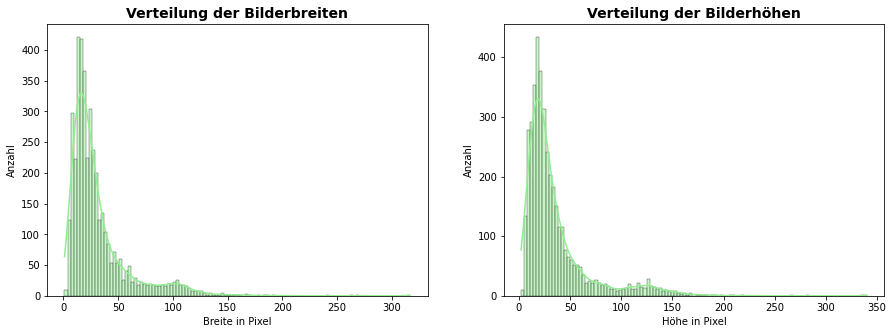

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
ax1, ax2 = axs.flat

ax1.set_ylabel("Anzahl")
ax1.set_xlabel("Breite in Pixel")
ax2.set_ylabel("Anzahl")
ax2.set_xlabel("Höhe in Pixel")

sns.histplot(im_width, kde = True, color = 'lightgreen', ax = ax1)
sns.histplot(im_height, kde = True, color = 'lightgreen', ax = ax2)

ax1.set_title('Verteilung der Bilderbreiten', fontsize = 14, fontweight = 'bold')
ax2.set_title('Verteilung der Bilderhöhen', fontsize = 14, fontweight = 'bold')

plt.show()

In [23]:
med_width = int(np.median(im_width))
med_height = int(np.median(im_height))

In [24]:
med_size = (med_height, med_width)
med_size

(24, 22)

In [25]:
med_shape = (med_height, med_width,3)
med_shape

(24, 22, 3)

<a name="datensätze_splitten"></a>
## 6. Datensätze splitten

Im vorherigen Kapitel wurde festgestellt, dass die Datenbasis unbalanciert ist und somit die Daten ungleich auf die Klassen verteilt sind. Daher ist nun das Ziel, neben den unbalancierten Datensätzen auch Datensätze zu erzeugen, welche sich in Balance befinden. Hierzu wird im Verlauf des Kapitels die Bibliothek `imblearn` verwendet, die mittels Under- bzw. Over-Sampling die Daten reduzieren bzw. hochskalieren kann. Die generierten Datensätze dienen anschließend dem Vergleich der maschinellen Lernverfahren.

Bisher liegen alle vorhandenen Daten in einem DataFrame vor. Für ein effizientes Training und anschließende Evaluierung ist es allerdings erforderlich, die Daten in unterschiedliche Datensätze aufzuteilen: in ein Test- sowie ein Trainings-Datenset.<br>
Scikit-Learn bietet ein Modul, welches ein einfaches Splitten der Daten ermöglicht. Es werden 20% der Daten für das Trainings-Set festgelegt, was einem weitläufigen Standard im Bereich des maschinellen Lernens entspricht.<br>
Nach dem Splitten ist es ratsam zu prüfen, ob beide Datensätze korrekt erstellt wurden. Dazu bietet sich die Ausgabe der Shape an. 

In [26]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical   

In [27]:
train_set, test_set = train_test_split(dfData, test_size=0.2, random_state = 42)

In [28]:
train_set.shape, test_set.shape

((3257, 11), (815, 11))

Nachdem die Daten in Test- und Trainings-Sets gesplittet wurden, müssen die Daten weiter unterteilt werden. Es werden die X-Datensets benötigt, die die unabhängigen Features enthalten und damit als Input für die Algorithmen dienen.<br>
Weiterhin werden die Y-Datensets benötigt, welche die abhängigen Variablen bzw. die Labels enthalten und somit bei den Modellen den Output bzw. die Zieldaten definieren.<br>
Die zuvor erstellten Trainings- und Test-Sets werden also jeweils in zwei weitere Datensets aufgeteilt:
- X-Trainingsdaten
- Y-Trainingsdaten
- X-Testdaten
- Y-Testdaten

Beim Erzeugen der Datensets werden die jeweils zugehörigen Bounding-Box-Bilder importiert und den Listen als Array mit der Shape `24,22,3`hinzugefügt.

In [29]:
x_train = []
y_train = []
for i in train_set.index:
    file = train_set['image_bb'][i]
    path = 'Source/images_bb/'+file
    im = cv2.imread(path)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    im = cv2.resize(im, (med_width, med_height))
    x_train.append(im)
    label = train_set['label'][i]
    y_train.append(label)

In [30]:
x_test = []
y_test = []
for i in test_set.index:
    file = test_set['image_bb'][i]
    path = 'Source/images_bb/'+file
    im = cv2.imread(path)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    im = cv2.resize(im, (med_width, med_height))
    x_test.append(im)
    label = test_set['label'][i]
    y_test.append(label)

Standardmäßig werden die Array-Daten, die als RGB-Werte auf der Skala von 0 bis 255 vorhanden sind, durch 255 dividiert. Durch die Umwandlung in Gleitkommazahlen steigt die Genauigkeit und die interne Verarbeitung der Daten wird erleichtert.

In [31]:
x_train = np.asarray(x_train)/255.0
x_test = np.asarray(x_test)/255.0

Anschließend können die Shapes der Datensets geprüft werden. Bei den X-Datensets ist beispielsweise zu erkennen, dass diese 3257 bzw. 815 Datensätze (also Bilder) enthalten und die zugehörigen Bilddaten in Arrays der Form 24,22,3 vorhanden sind.<br>
Die Y-Datensets wiederum enthalten zwar genauso viele Datensätze, enthalten aber nur die Labels und bestehen daher nicht aus Arrays der Form 24,22,3.

In [32]:
x_train.shape, x_test.shape

((3257, 24, 22, 3), (815, 24, 22, 3))

In [33]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [34]:
y_train.shape, y_test.shape

((3257,), (815,))

Da im weiteren Verlauf für die Modelle des maschinellen Lernens die Bibliothek `Scikit-Learn` verwendet wird müssen die Bilder-Arrays umdimensioniert werden.<br> 
Scikit-Learn arbeitet standardmäßig mit 2D Arrays und erwartet diese deshalb als Input-Daten, weshalb im Folgenden die vorliegenden 4D-Arrays transfomiert werden.<br>
Anschließend wird durch Ausgabe der Shape geprüft, ob die Umwandlung erfolgreich war.

In [35]:
i, x, y, rgb = x_train.shape
x_train2d = x_train.reshape(i, x*y*rgb)

In [36]:
i, x, y, rgb = x_test.shape
x_test2d = x_test.reshape(i, x*y*rgb)

In [37]:
x_train2d.shape, x_test2d.shape

((3257, 1584), (815, 1584))

Da die Label-Informationen als Strings vorhanden sind, müssen auch hier Änderungen vorgenommen werden. <br>
Algorithmen des maschinellen Lernens können wesentlich besser nummerische Daten verarbeiten, weshalb eine Einsortierung der vorhandenen Labels in nummerische Kategorien erfolgt.

In [38]:
y_train_label, y_train = np.unique(y_train, return_inverse=True)
y_test_label, y_test = np.unique(y_test, return_inverse=True)

In [39]:
np.unique(y_train), np.unique(y_test)

(array([0, 1, 2], dtype=int64), array([0, 1, 2], dtype=int64))

Als Kategorien sind nun die Nummern 0, 1 und 2 vorhanden, eine Zuordnung der Katgorie-Nummern zur String-Bezeichnung ist Folgend dargestellt.

In [40]:
print('Kategorie 0:', y_train_label[0])
print('Kategorie 1:', y_train_label[1])
print('Kategorie 2:', y_train_label[2])

Kategorie 0: mask_weared_incorrect
Kategorie 1: with_mask
Kategorie 2: without_mask


<a name="unbalanced"></a>
### 6.1 Unbalancierte Daten

Nachdem nun die Daten in Trainings- und Testsets unterteilt wurden, werfen wir erneut einen Blick auf die Verteilung der Labels in den beiden Ziel-Datensätzen.<br>
Im erzeugten Diagramm wird für beide Datensätze jeweils der prozentuelle Anteil der einzelnen Labels visualisiert. Hier ist erkennbar, dass die Verteilung in beiden Datensätzen vergleichbar ist und somit die Trainingsdaten die Testdaten gut abbilden.<br>

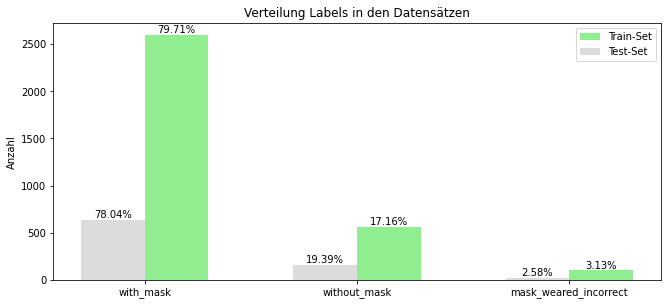

In [41]:
train_l1, train_l2, train_l3 = (y_train == 1).sum(),(y_train == 2).sum(),(y_train == 0).sum()
test_l1, test_l2, test_l3 = (y_test == 1).sum(),(y_test == 2).sum(),(y_test == 0).sum()

bar_labels = ['with_mask', 'without_mask', 'mask_weared_incorrect']
train_l = [train_l1, train_l2, train_l3]
train_l_perc = [str(round(100/y_train.shape[0]*train_l1, 2))+ '%', 
                str(round(100/y_train.shape[0]*train_l2, 2))+ '%', 
                str(round(100/y_train.shape[0]*train_l3, 2))+ '%']
test_l = [test_l1, test_l2, test_l3]
test_l_perc = [str(round(100/y_test.shape[0]*test_l1, 2))+ '%', 
               str(round(100/y_test.shape[0]*test_l2, 2))+ '%', 
               str(round(100/y_test.shape[0]*test_l3, 2))+ '%']

x = np.arange(len(bar_labels))

fig, ax = plt.subplots(figsize=(9, 4))
fig.tight_layout(pad=0.5, w_pad=2.0, h_pad=3.0)

ax_train = ax.bar(x + 0.15, train_l, 0.3, label='Train-Set', tick_label = train_l, color='lightgreen')
ax_test = ax.bar(x - 0.15, test_l, 0.3, label='Test-Set', color = 'gainsboro')

plt.xticks(x, bar_labels)
plt.ylabel("Anzahl")
plt.title("Verteilung Labels in den Datensätzen")
plt.legend(bbox_to_anchor =(1,1))
ax.bar_label(ax_train, labels = train_l_perc)
ax.bar_label(ax_test, labels = test_l_perc)

plt.show()

Da sowohl mit den unbalancierten Original-Daten, als auch mit denen des Under- und Over-Sampling Modelle trainiert werden sollen, erzeugen wir im Folgenden separate Datensätze der Original-Daten. Dadurch ist im weiteren Verlauf eine bessere Zuordnung der einzelnen Datensätze möglich.<br>
So werden alle beim späteren Training zu verwendenden unbalancierten Datensätze mit der Endung `_org` gekennzeichnet.

In [42]:
x_train_org = x_train2d
x_test_org = x_test2d

In [43]:
y_train_org = y_train
y_test_org = y_test

<a name="under-sampled"></a>
### 6.2 Under-Sampling Daten

Als nächster Schritt folgt die erste Modifikation der Daten: das sogenannte Random-Under-Sampling. Ziel ist hierbei, dass für alle Labels die selbe Anzahl an Datensätzen existieren, die Daten also somit "ausbalanciert" sind.<br>
Das Under-Sampling bedeutet, dass die Anzahl aller Daten auf die kleinste Menge der Datensätze, die bei einem der Labels vorhanden sind, reduziert wird.<br>
In diesem Fall bedeutet das, dass die Daten, die für die Labels `with_mask` und `without_mask` vorhanden sind, auf die Anzahl der Daten für das Label `mask_weared_incorrect` reduziert werden.<br>
Nachteil dieser Methode ist, dass durch das Entfernen der Daten möglicherweise Informationen verloren gehen, die wertvoll für das Training des Algorithmus sind.

Für die Umsetzung des Under- und Over-Sampling wird die Bibliothek `imblearn` verwendet, diese muss ggf. zunächst installiert werden.<br>
Im Anschluss erfolgt aus dieser Bibliothek der Import des `RandomUnderSampler`.

In [44]:
imblearn = !pip list | grep imblearn
if len(imblearn) == 0:
    !pip install imblearn
else:
    print("Modul 'imblearn' ist bereits installiert.")

Modul 'imblearn' ist bereits installiert.


In [45]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

Es wird ein RandomUnderSampler erzeugt, welcher wiederum dazu dient, vier neue Datensätze zu generieren:
- `x_train_rus`
- `y_train_rus`
- `x_test_rus`
- `y_test_rus`

Die Endung `_rus` steht für RandomUnderSampler - die vier genannten Datensätze werden somit für das Training des Algorithmus mit den under-sampled Daten verwendet.

In [46]:
rus = RandomUnderSampler(random_state = 42, replacement = True)

In [47]:
x_train_rus, y_train_rus = rus.fit_resample(x_train2d, y_train)
x_test_rus, y_test_rus = rus.fit_resample(x_test2d, y_test)

Im nachfolgenden Diagramm ist die Verteilung der Labels in den soeben erzeugten Datensätzen dargestellt. Hierbei ist auch erkennbar, was der RandomUnderSampler getan hat: die Anzahl aller Daten für die Labels wurde vereinheitlicht auf die kleinste Menge eines Labels, welche bei `mask_weared_incorrect` vorhanden war.

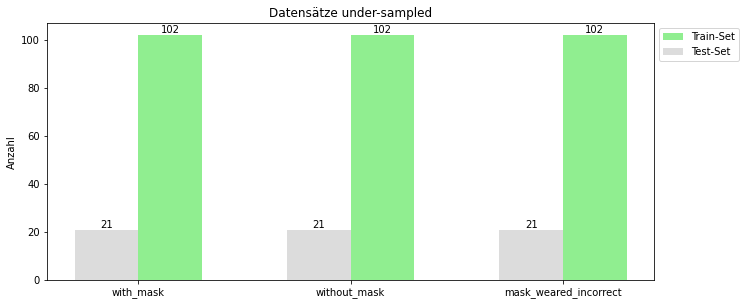

In [48]:
train_l1, train_l2, train_l3 = (y_train_rus == 1).sum(),(y_train_rus == 2).sum(),(y_train_rus == 0).sum()
test_l1, test_l2, test_l3 = (y_test_rus == 1).sum(),(y_test_rus == 2).sum(),(y_test_rus == 0).sum()

bar_labels = ['with_mask', 'without_mask', 'mask_weared_incorrect']
train_l = [train_l1, train_l2, train_l3]
test_l = [test_l1, test_l2, test_l3]

x = np.arange(len(bar_labels))

fig, ax = plt.subplots(figsize=(9, 4))
fig.tight_layout(pad=0.5, w_pad=2.0, h_pad=3.0)

ax_train = ax.bar(x + 0.15, train_l, 0.3, label='Train-Set', tick_label = train_l, color='lightgreen')
ax_test = ax.bar(x - 0.15, test_l, 0.3, label='Test-Set', color = 'gainsboro')

plt.xticks(x, bar_labels)
plt.ylabel("Anzahl")
plt.title("Datensätze under-sampled")
plt.legend(bbox_to_anchor =(1,1))
ax.bar_label(ax_train)
ax.bar_label(ax_test)

plt.show()

<a name="over-sampled"></a>
### 6.3 Over-Sampling Daten

Nachdem das Under-Sampling der Daten durchgeführt wurde, erfolgt nun das Over-Sampling. Diese Methode funktioniert identisch zum Under-Sampling mit dem Unterschied, dass die Daten auf das Label mit den meisten Datensätzen hochskaliert werden.<br> 
In diesem Fall besitzt das Label `with_mask` die mit Abstand meisten Daten, weshalb für die beiden anderen Labels die Generierung neuer Datensätze erfolgt.<br>
Over-Sampling ist von Vorteil, wenn grundsätzlich wenig Daten vorliegen - allerdings birgt es ab einem gewissen Punkt auch die Gefahr eines Overfittings.<br>
Auch hier wird der entsprechende Klassifikator `RandomOverSampler` aus der Bibliothek `imblearn` importiert.<br>

In [49]:
from imblearn.over_sampling import RandomOverSampler

Analog zum vorherigen Abschnitt wird ein `RandomOverSampler` angelegt, welcher dazu dient, vier neue Datensätze zu erzeugen:
- `x_train_ros`
- `y_train_ros`
- `x_test_ros`
- `y_test_ros`

Die Endung `_ros` steht für RandomOverSampler und daher dienen die generierten Datensätze dem Training des Modells mit den over-sampled Daten.

In [50]:
ros = RandomOverSampler(random_state = 42)

In [51]:
x_train_ros, y_train_ros = ros.fit_resample(x_train2d, y_train)
x_test_ros, y_test_ros = ros.fit_resample(x_test2d, y_test)

Ebenfalls vergleichbar mit dem vorherigen Abschnitt ist auch in diesem Diagramm erkennbar, dass alle Datensätze einheitlich skaliert wurden. <br>
Die Anzahl der Daten ist deutlich gestiegen, da das Label `with_mask`, welches die meisten Daten enthielt, zur Generierung neuer Daten maßgebend war.

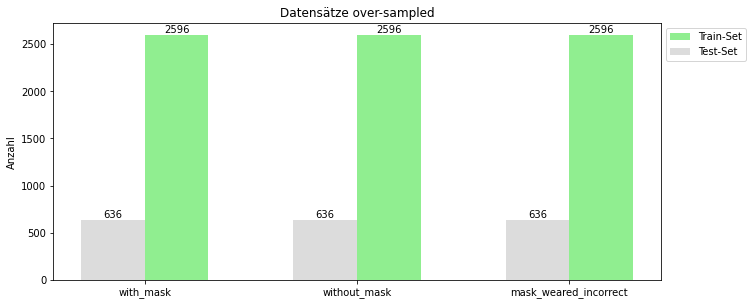

In [52]:
train_l1, train_l2, train_l3 = (y_train_ros == 1).sum(),(y_train_ros == 2).sum(),(y_train_ros == 0).sum()
test_l1, test_l2, test_l3 = (y_test_ros == 1).sum(),(y_test_ros == 2).sum(),(y_test_ros == 0).sum()

bar_labels = ['with_mask', 'without_mask', 'mask_weared_incorrect']
train_l = [train_l1, train_l2, train_l3]
test_l = [test_l1, test_l2, test_l3]

x = np.arange(len(bar_labels))

fig, ax = plt.subplots(figsize=(9, 4))
fig.tight_layout(pad=0.5, w_pad=2.0, h_pad=3.0)

ax_train = ax.bar(x + 0.15, train_l, 0.3, label='Train-Set', tick_label = train_l, color='lightgreen')
ax_test = ax.bar(x - 0.15, test_l, 0.3, label='Test-Set', color = 'gainsboro')

plt.xticks(x, bar_labels)
plt.ylabel("Anzahl")
plt.title("Datensätze over-sampled")
plt.legend(bbox_to_anchor =(1,1))
ax.bar_label(ax_train)
ax.bar_label(ax_test)

plt.show()


<a name="ml"></a>
## 7. Maschinelles Lernen

Starten wir nun mit dem maschinellen Lernen.<br>
In diesem Abschnitt geht es nun darum, jeweils drei unterschiedliche Varianten mit maschinellen Lernverfahren zu trainieren:

- die unbalancierten Original-Daten
- die under-sampled Daten
- die over-sampled Daten

Für das Training werden klassische Algorithmen des maschinellen Lernens verwendet: Entscheidungsbäume sowie Random Forest. Als Grundlage hierfür dient wie gehabt die Bibliothek `scikit-learn`, aus welcher entsprechende Klassifikatoren für Decision Trees sowie Random Forest importiert werden.<br>
Zusätzlich erfolgt der Import verschiedener Metriken, die bei der anschließenden Auswertung bzw. Evaluation der Modelle hilfreich sind.<br><br>
Eine sehr wichtige Metrik zu Bewertung des Modells ist die sogenannte Confusion-Matrix.<br>
Diese spiegelt die Performance des Modells wieder und lässt erkennen, ob Vorhersagen in den einzelnen Klassen korrekt getroffen  oder als falsch positiv (d.h. fälschlicherweise der Klasse zugeordnet) bzw. falsch negativ (d.h. der falschen Klasse zugeordnet) klassifiziert wurden.<br>
Die Diagonale spiegelt hierbei die korrekten Vorhersagen wieder, diese Werte sollten daher im Idealfall prozentual gesehen wesentlich höher sein als die Übrigen.<br><br>
Von ebenfalls großer Bedeutung ist der Accuracy-Score, der die Genauigkeit des Modells auf Basis der insgesamt korrekt prognostizierten Daten wiedergibt.<br><br>
Um die Modelle jedoch umfassender bewerten zu können, sind zusätzlich drei weitere Metriken relevant: Der Recall-Score, der Präzisionswert sowie das F1-Maß.<br>
Die Präzision misst den Anteil der korrekten Vorhersagen bezogen auf die Gesamtanzahl der Vorhersagen. Ein niedriger Wert bedeutet hier also, dass viele falsche positive Vorhersagen getroffen wurden.<br>
Der Recall-Score wiederum ergibt sich aus dem Anteil der korrekten Vorhersagen bezogen auf die Gesamtzahl der tatsächlichen Datensätze. Ein niedriger Recall-Wert zeigt beispielweise an, dass viele falsche negative Vorhersagen vorhanden sind.<br>
Eine Kombination aus Präzisionswert und Recall-Score stellt das F1-Maß dar, welches den gewichteten Mittelwert aus den beiden Metriken bildet.<br>


_Hinweis: Bei den im Text erläuterten Prozent-Werten sowie Korrelationen in diesem sowie dem folgendem Kapitel können bei erneutem Training der Algorithmen leichte Abweichungen entstehen. Diese dienen daher eher als Richtwerte und basieren daher auf dem Trainingsergebnissen, die zum Zeitpunkt der Erstellung der Ausarbeitung vorlagen._


In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

<a name="dt"></a>
### 7.1 Decision Tree

Bevor mit dem Training gestartet werden kann muss zunächst ein `DecisionTreeClassifier` importiert werden.<br>
Entscheidungsbäume sind recht flexible maschinelle Lernverfahren und können neben der Klassifikation auch für Regressionsaufgaben genutzt werden. Da sie außerdem multiple Ausgaben verarbeiten können und die Grundlage für den später verwendeten Random Forest Algorithmus bilden, wurde sich in dieser Ausarbeitung für die Verwendung von Entscheidungsbäumen entschieden. [4]<br>
Zunächst erfolgt das Training eines Entscheidungsbaumes mit den unbalancierten Daten, bevor anschließend die under-sampled-Daten sowie die over-sampled-Daten verwendet werden.

In [54]:
from sklearn.tree import DecisionTreeClassifier

<a name="dt_unbalanced"></a>
#### 7.1.1 Unbalancierte Daten

Unter dem Namen `dt_org` wird nun der erste Entscheidungsbaum für die Original-Daten erzeugt.<br>
Dieser wird anschließend mit den zuvor definierten Trainingsdaten (X als Input, Y als Zielwerte) trainiert.<br>
Im Anschluss erfolgt die Vorhersage auf Basis der X-Testdaten, welche in einer Variablen gespeichert werden.

In [55]:
dt_org = DecisionTreeClassifier()
dt_org.fit(x_train_org,y_train_org)
dt_org_pred = dt_org.predict(x_test_org)

Die zuvor vom Decision Tree getätigte Vorhersage wird nun mit den tatsächlichen Y-Testdaten verglichen, um die Genauigkeit (engl. Accuracy) des Modells festzustellen.<br>
Diese liegt bei etwa 87% und bietet damit noch Optimierungspotenzial, auf den ersten Blick scheint das Training dieses Modells jedoch erfolgreich gewesen zu sein.<br>

In [56]:
dt_org_acc = round(accuracy_score(y_test_org, dt_org_pred) * 100, 2)

print(f'Accuracy: {dt_org_acc} %')

Accuracy: 86.75 %


Beim Blick auf die Confusion-Matrix ist für unbalancierten Daten deutlich erkennbar, dass zwar die Vorhersage des Labels mit den meisten Daten, `with_mask`, sehr gut funktioniert - die unterrepräsentierten Klassen, vor allem `mask_weared_incorrect`, weisen jedoch eine geringere Vorhersagegenauigkeit auf.

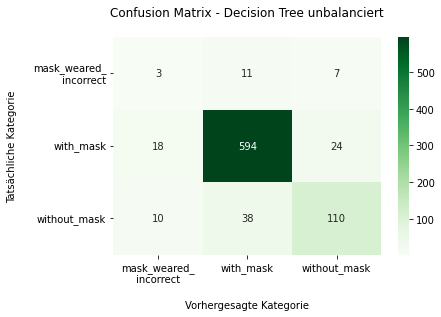

In [57]:
cfm_dt_org = confusion_matrix(y_test_org, dt_org_pred)
ax = sns.heatmap(cfm_dt_org, annot = True, fmt='', cmap= 'Greens')

ax.xaxis.set_ticklabels(['mask_weared_\nincorrect','with_mask', 'without_mask'])
ax.yaxis.set_ticklabels(['mask_weared_\nincorrect','with_mask', 'without_mask'], rotation = 0)

ax.set_title('Confusion Matrix - Decision Tree unbalanciert\n')
ax.set_xlabel('\nVorhergesagte Kategorie')
ax.set_ylabel('Tatsächliche Kategorie\n');

Durch die Analyse von Präzisionswert, Recall-Score und F1-Maß ist genau erkennbar, was die Confusion-Matrix visuell dargestellt hat. <br><br>
Der Präzisionswert in der Kategorie `with_mask` liegt bei über 90%, wohingegen `without_mask` nur noch etwas über 75% Genauigkeit erreicht. Die Kategorie `masked_weared_incorrect` wird sogar nur in unter 10% der Fälle korrekt vorhergesagt.<br>
Ermittelt man aus diesen drei Werten die mittlere Präzision ist erkennbar, dass diese mit ca. 60% deutlich von dem zuvor ermittelten Accuracy-Score von 87% abweicht.

In [58]:
dt_org_prec = precision_score(y_test_org, dt_org_pred, average=None)
dt_org_prec0 = round(dt_org_prec[0] * 100, 2)
dt_org_prec1 = round(dt_org_prec[1] * 100, 2)
dt_org_prec2 = round(dt_org_prec[2] * 100, 2)
dt_org_prec = round(precision_score(y_test_org, dt_org_pred, average='macro') * 100, 2)

print(f'Präzision Label 0: {y_train_label[0]} ---- {dt_org_prec0} %')
print(f'Präzision Label 1: {y_train_label[1]} ---------------- {dt_org_prec1} %')
print(f'Präzision Label 2: {y_train_label[2]} ------------- {dt_org_prec2} %')
print(f'Präzision insgesamt: ------------------------ {dt_org_prec} %')

Präzision Label 0: mask_weared_incorrect ---- 9.68 %
Präzision Label 1: with_mask ---------------- 92.38 %
Präzision Label 2: without_mask ------------- 78.01 %
Präzision insgesamt: ------------------------ 60.02 %


Die Auswertung der Recall-Scores ergibt ein recht ähnliches Bild: während die Klasse `with_mask` weiterhin einen hohen Score erzielt, fällt die Klasse `without_mask` bereits ab - bei der Kategorie `masked_weared_incorrect` wird zwar verglichen mit der Präzision ein etwas höherer, insgesamt jedoch weiterhin niedriger Score ermittelt.

In [59]:
dt_org_rec = recall_score(y_test_org, dt_org_pred, average=None)
dt_org_rec0 = round(dt_org_rec[0] * 100, 2)
dt_org_rec1 = round(dt_org_rec[1] * 100, 2)
dt_org_rec2 = round(dt_org_rec[2] * 100, 2)
dt_org_rec = round(recall_score(y_test_org, dt_org_pred, average='macro') * 100, 2)

print(f'Recall Label 0: {y_train_label[0]} ---- {dt_org_rec0} %')
print(f'Recall Label 1: {y_train_label[1]} ---------------- {dt_org_rec1} %')
print(f'Recall Label 2: {y_train_label[2]} ------------- {dt_org_rec2} %')
print(f'Recall insgesamt: ------------------------ {dt_org_rec} %')

Recall Label 0: mask_weared_incorrect ---- 14.29 %
Recall Label 1: with_mask ---------------- 93.4 %
Recall Label 2: without_mask ------------- 69.62 %
Recall insgesamt: ------------------------ 59.1 %


Wird nun das F1-Maß herangezogen ist abzulesen, dass dieses ein recht vergleichbares Bild wiedergibt. Das Label `mask_weared_incorrect` fällt deutlich ab und wird nur in etwa 12% der Fälle korrekt vorhergesagt.

In [60]:
dt_org_f1 = f1_score(y_test_org, dt_org_pred, average=None)
dt_org_f10 = round(dt_org_f1[0] * 100, 2)
dt_org_f11 = round(dt_org_f1[1] * 100, 2)
dt_org_f12 = round(dt_org_f1[2] * 100, 2)
dt_org_f1 = round(f1_score(y_test_org, dt_org_pred, average='macro') * 100, 2)

print(f'F1-Score Label 0: {y_train_label[0]} ---- {dt_org_f10} %')
print(f'F1-Score Label 1: {y_train_label[1]} ---------------- {dt_org_f11} %')
print(f'F1-Score Label 2: {y_train_label[2]} ------------- {dt_org_f12} %')
print(f'F1-Score insgesamt: ------------------------ {dt_org_f1} %')

F1-Score Label 0: mask_weared_incorrect ---- 11.54 %
F1-Score Label 1: with_mask ---------------- 92.89 %
F1-Score Label 2: without_mask ------------- 73.58 %
F1-Score insgesamt: ------------------------ 59.33 %


Interessant ist außerdem, welches der Merkmale beim Training des Modells von größerer Bedeutung waren und welche nicht.<br>
Da es sich bei den Eingabedaten um Bilder handelt und die Merkmale bzw. Features daher aus den einzelnen Pixeln bestehen ist nachfolgend eine Map dargestellt, die die Bedeutung der einzelnen Pixel für die Vorhersage ausgibt.<br>
Es ist erkennbar, dass einzelne Pixel etwa mittig des Bildes von größerer Relevanz sind (also in etwa dort, wo sich vermutlich die Gesichtsmaske häufig befindet), jedoch lässt sich hier kein genaueres Muster erkennen.<br>
Zur besseren Farbskalierung werden die Pixelwerte auf Graustufen umgerechnet, da andernfalls jedes Pixel drei Farbkanäle beinhaltet, was zu einem bunten Mix führen würde.

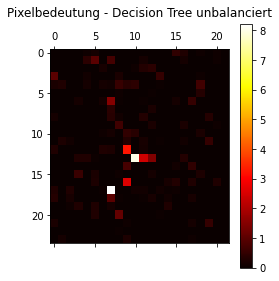

In [61]:
dt_org_importances = dt_org.feature_importances_.reshape(med_shape)*255
R, G, B = dt_org_importances[:,:,0], dt_org_importances[:,:,1], dt_org_importances[:,:,2]
dt_org_importances = 0.2989 * R + 0.5870 * G + 0.1140 * B

plt.matshow(dt_org_importances, cmap = plt.cm.hot)
plt.title("Pixelbedeutung - Decision Tree unbalanciert", pad = 15)
plt.colorbar()
plt.show()

<a name="dt_under-sampled"></a>
#### 7.1.2 Under-Sampling Daten

Als nächstes erfolgt das Training eines Entscheidungsbaums mit den under-sampled-Daten.<br>
Hierzu wird zunächst ein weiterer Decision Tree `dt_rus` erzeugt und anschließend mit den under-sampled-Trainingsdaten trainiert sowie eine Vorhersage auf den Testdaten getroffen.<br>

In [62]:
dt_rus = DecisionTreeClassifier()
dt_rus.fit(x_train_rus,y_train_rus)
dt_rus_pred = dt_rus.predict(x_test_rus)

Die Vorhersage-Genauigkeit des Entscheidungsbaums ist deutlich niedriger als zuvor, sie liegt nur noch bei um die 59%.

In [63]:
dt_rus_acc = round(accuracy_score(y_test_rus, dt_rus_pred) * 100, 2)

print(f'Accuracy: {dt_rus_acc} %')

Accuracy: 58.73 %


Die Confusion-Matrix bei den under-sampled-Daten sieht dafür wesentlich homogener aus.<br>
In allen drei Kategorien werden in etwa gleich viele Daten korrekt erkannt.

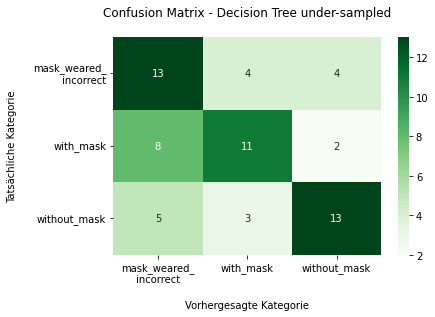

In [64]:
cfm_dt_rus = confusion_matrix(y_test_rus, dt_rus_pred)
ax = sns.heatmap(cfm_dt_rus, annot = True, fmt='', cmap= 'Greens')

ax.xaxis.set_ticklabels(['mask_weared_\nincorrect','with_mask', 'without_mask'])
ax.yaxis.set_ticklabels(['mask_weared_\nincorrect','with_mask', 'without_mask'], rotation = 0)

ax.set_title('Confusion Matrix - Decision Tree under-sampled\n')
ax.set_xlabel('\nVorhergesagte Kategorie')
ax.set_ylabel('Tatsächliche Kategorie\n');

Auch die Präzisionswerte sind ausgeglichener, es werden in etwa gleich viele Datenpunkte als falsch-positiv den Klassen zugeordnet.<br>
Durch das Reduzieren der Daten scheinen wichtige Merkmale verloren gegangen zu sein, die für die korrekte Klassifizeriung der Kategorien `with_mask` und `without_mask` notwendig sind. Dadurch ist die Präzision in beiden Kategorien zurückgegangen und gleichzeitig in der Kategorie `masked_weared_incorrect` gestiegen.

Dadurch, dass die Daten jedoch vollkommen ausbalanciert sind, befindet sich der zuvor ermittelte Accuracy-Score auch auf einem sehr ähnlichem Niveau wie die durchschnittliche Präzision über alle Kategorien.<br>

In [65]:
dt_rus_prec = precision_score(y_test_rus, dt_rus_pred, average=None)
dt_rus_prec0 = round(dt_rus_prec[0] * 100, 2)
dt_rus_prec1 = round(dt_rus_prec[1] * 100, 2)
dt_rus_prec2 = round(dt_rus_prec[2] * 100, 2)
dt_rus_prec = round(precision_score(y_test_rus, dt_rus_pred, average='macro') * 100, 2)

print(f'Präzision Label 0: {y_train_label[0]} ---- {dt_rus_prec0} %')
print(f'Präzision Label 1: {y_train_label[1]} ---------------- {dt_rus_prec1} %')
print(f'Präzision Label 2: {y_train_label[2]} ------------- {dt_rus_prec2} %')
print(f'Präzision insgesamt: ------------------------ {dt_rus_prec} %')

Präzision Label 0: mask_weared_incorrect ---- 50.0 %
Präzision Label 1: with_mask ---------------- 61.11 %
Präzision Label 2: without_mask ------------- 68.42 %
Präzision insgesamt: ------------------------ 59.84 %


Ein ähnliches Ergebnis liefert auch der Recall-Score. Es werden in allen Kategorien in etwa gleich viele Daten fälschlicherweise als negativ bewertet.

In [66]:
dt_rus_rec = recall_score(y_test_rus, dt_rus_pred, average=None)
dt_rus_rec0 = round(dt_rus_rec[0] * 100, 2)
dt_rus_rec1 = round(dt_rus_rec[1] * 100, 2)
dt_rus_rec2 = round(dt_rus_rec[2] * 100, 2)
dt_rus_rec = round(recall_score(y_test_rus, dt_rus_pred, average='macro') * 100, 2)

print(f'Recall Label 0: {y_train_label[0]} ---- {dt_rus_rec0} %')
print(f'Recall Label 1: {y_train_label[1]} ---------------- {dt_rus_rec1} %')
print(f'Recall Label 2: {y_train_label[2]} ------------- {dt_rus_rec2} %')
print(f'Recall insgesamt: ------------------------ {dt_rus_rec} %')

Recall Label 0: mask_weared_incorrect ---- 61.9 %
Recall Label 1: with_mask ---------------- 52.38 %
Recall Label 2: without_mask ------------- 61.9 %
Recall insgesamt: ------------------------ 58.73 %


Dadurch, dass die Werte nahezu ausgeglichen sind, ergibt sich dieses Bild natürlich auch beim F1-Score.<br>
Die Werte liegen grob zwischen 55% und 65%, die Qualität des Modells ist verglichen mit den unbalancierten Daten etwas gesunken.

In [67]:
dt_rus_f1 = f1_score(y_test_rus, dt_rus_pred, average=None)
dt_rus_f10 = round(dt_rus_f1[0] * 100, 2)
dt_rus_f11 = round(dt_rus_f1[1] * 100, 2)
dt_rus_f12 = round(dt_rus_f1[2] * 100, 2)
dt_rus_f1 = round(f1_score(y_test_rus, dt_rus_pred, average='macro') * 100, 2)

print(f'F1-Score Label 0: {y_train_label[0]} ---- {dt_rus_f10} %')
print(f'F1-Score Label 1: {y_train_label[1]} ---------------- {dt_rus_f11} %')
print(f'F1-Score Label 2: {y_train_label[2]} ------------- {dt_rus_f12} %')
print(f'F1-Score insgesamt: ------------------------ {dt_rus_f1} %')

F1-Score Label 0: mask_weared_incorrect ---- 55.32 %
F1-Score Label 1: with_mask ---------------- 56.41 %
F1-Score Label 2: without_mask ------------- 65.0 %
F1-Score insgesamt: ------------------------ 58.91 %


Anschließend erfolgt auch zu den under-sampled-Daten nochmals eine Darstellung der relevantesten Pixel.<br>
Ähnlich wie bei den unbalancierten Daten finden sich zentral ein paar besonders relevante Merkmale wieder, jedoch ist auch hier kein genaueres Muster erkennbar. Die Relevanz verteilt sich allerdings etwas mehr über das gesamte Bild als zuvor.<br>

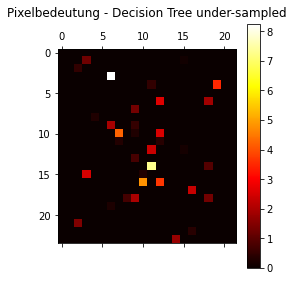

In [68]:
dt_rus_importances = dt_rus.feature_importances_.reshape(med_shape)*255
R, G, B = dt_rus_importances[:,:,0], dt_rus_importances[:,:,1], dt_rus_importances[:,:,2]
dt_rus_importances = 0.2989 * R + 0.5870 * G + 0.1140 * B

plt.matshow(dt_rus_importances, cmap = plt.cm.hot)
plt.title("Pixelbedeutung - Decision Tree under-sampled", pad = 15)
plt.colorbar()
plt.show()

<a name="dt_over-sampled"></a>
#### 7.1.3 Over-Sampling Daten

Da beim Under-Sampling vergleichsweise wenig Daten für das Training verwendet wurden, lässt sich die Genauigkeit gegebenfalls mit einer größeren Datengrundlage erhöhen.<br>
Dazu erfolgt die Erstellung eines weiteren Decision Trees `dt_ros`, welcher auf die over-sampled Trainingsdaten trainiert wird. Die anschließende Vorhersage wird nun auf den entsprechendenen Testdaten für das Over-Sampling getroffen.

In [69]:
dt_ros = DecisionTreeClassifier()
dt_ros.fit(x_train_ros,y_train_ros)
dt_ros_pred = dt_ros.predict(x_test_ros)

Es ist erkennbar, dass die Genauigkeit im Vergleich zum under-sampled Decision Tree leicht gestiegen ist.

In [70]:
dt_ros_acc = round(accuracy_score(y_test_ros, dt_ros_pred) * 100, 2)

print(f'Accuracy: {dt_ros_acc} %')

Accuracy: 59.54 %


Beim Blick auf die Confusion-Matrix fällt auf, dass vor allem in der oberen Zeile, d.h. bei den tatsächlichen Daten der Klasse `mask_weared_incorrect`, sehr viele nicht korrekte Vorhersagen vorhanden sind.<br>

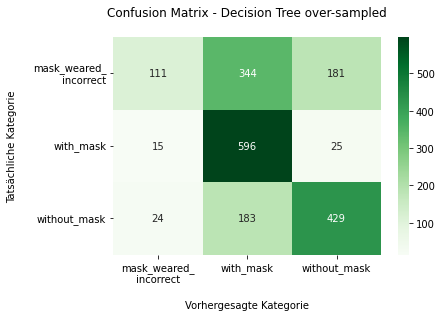

In [71]:
cfm_dt_ros = confusion_matrix(y_test_ros, dt_ros_pred)
ax = sns.heatmap(cfm_dt_ros, annot = True, fmt='', cmap= 'Greens')

ax.xaxis.set_ticklabels(['mask_weared_\nincorrect','with_mask', 'without_mask'])
ax.yaxis.set_ticklabels(['mask_weared_\nincorrect','with_mask', 'without_mask'], rotation = 0)

ax.set_title('Confusion Matrix - Decision Tree over-sampled\n')
ax.set_xlabel('\nVorhergesagte Kategorie')
ax.set_ylabel('Tatsächliche Kategorie\n');

Untersucht man die Präzisionen der einzelnen Kategorien, ergibt sich ein relativ ausgeglichenes Bild.<br>
Die Werte liegen alle im gehobenen mittleren Bereich, hier sind keine großen Ausreißer erkennbar. Die durchschnittliche Präzision von etwa 61% bildet das Modell in diesem Punkt daher relativ gut ab.

In [72]:
dt_ros_prec = precision_score(y_test_ros, dt_ros_pred, average=None)
dt_ros_prec0 = round(dt_ros_prec[0] * 100, 2)
dt_ros_prec1 = round(dt_ros_prec[1] * 100, 2)
dt_ros_prec2 = round(dt_ros_prec[2] * 100, 2)
dt_ros_prec = round(precision_score(y_test_ros, dt_ros_pred, average='macro') * 100, 2)

print(f'Präzision Label 0: {y_train_label[0]} ---- {dt_ros_prec0} %')
print(f'Präzision Label 1: {y_train_label[1]} ---------------- {dt_ros_prec1} %')
print(f'Präzision Label 2: {y_train_label[2]} ------------- {dt_ros_prec2} %')
print(f'Präzision insgesamt: ------------------------ {dt_ros_prec} %')

Präzision Label 0: mask_weared_incorrect ---- 74.0 %
Präzision Label 1: with_mask ---------------- 53.07 %
Präzision Label 2: without_mask ------------- 67.56 %
Präzision insgesamt: ------------------------ 64.88 %


Wie bei der Confusion-Matrix schon erkennbar war, fällt beim Recall-Wert vor allem der Score für die Klasse `mask_weared_incorrect` auf.<br>
Diese Klasse erreicht lediglich einen Wert von 17%, d.h. es werden viele Daten nicht korrekt erkannt und anderen Klassen zugeordnet.<br>
Die Recall-Werte bei den beiden anderen Kategorien sind jedoch gestiegen und mit etwa 93% bzw. 67% ähnlich hoch wie bei den unbalancierten Daten.

In [73]:
dt_ros_rec = recall_score(y_test_ros, dt_ros_pred, average=None)
dt_ros_rec0 = round(dt_ros_rec[0] * 100, 2)
dt_ros_rec1 = round(dt_ros_rec[1] * 100, 2)
dt_ros_rec2 = round(dt_ros_rec[2] * 100, 2)
dt_ros_rec = round(recall_score(y_test_ros, dt_ros_pred, average='macro') * 100, 2)

print(f'Recall Label 0: {y_train_label[0]} ---- {dt_ros_rec0} %')
print(f'Recall Label 1: {y_train_label[1]} ---------------- {dt_ros_rec1} %')
print(f'Recall Label 2: {y_train_label[2]} ------------- {dt_ros_rec2} %')
print(f'Recall insgesamt: ------------------------ {dt_ros_rec} %')

Recall Label 0: mask_weared_incorrect ---- 17.45 %
Recall Label 1: with_mask ---------------- 93.71 %
Recall Label 2: without_mask ------------- 67.45 %
Recall insgesamt: ------------------------ 59.54 %


Auf Basis dieser Werte zeigt auch der F1-Score, dass vor allem die Kategorie `mask_weared_incorrect` negativ auffällt.<br>
Es sind zwar nun viele Testdaten durch das hochskalieren vorhanden, dennoch konnte die Genauigkeit in dieser Klasse verglichen mit den unbalancierten Daten nicht wesentlich gesteigert werden.<br>
Die Genauigkeit in der Klasse `with_mask` wurde sogar negativ durch das Over-Sampling in den anderen beiden Kategorien beeinflusst, da ihr viele falsch-positiven Vorhersagen zugeordnet wurden, die Genauigkeit ist hier von etwa 93% auf unter 70% gefallen.<br>
Ähnliches betrifft auch die Klasse `without_mask`, hier ist eine Reduzierung um etwa 5% verglichen mit den Original-Daten vorhanden.

In [74]:
dt_ros_f1 = f1_score(y_test_ros, dt_ros_pred, average=None)
dt_ros_f10 = round(dt_ros_f1[0] * 100, 2)
dt_ros_f11 = round(dt_ros_f1[1] * 100, 2)
dt_ros_f12 = round(dt_ros_f1[2] * 100, 2)
dt_ros_f1 = round(f1_score(y_test_ros, dt_ros_pred, average='macro') * 100, 2)

print(f'F1-Score Label 0: {y_train_label[0]} ---- {dt_ros_f10} %')
print(f'F1-Score Label 1: {y_train_label[1]} ---------------- {dt_ros_f11} %')
print(f'F1-Score Label 2: {y_train_label[2]} ------------- {dt_ros_f12} %')
print(f'F1-Score insgesamt: ------------------------ {dt_ros_f1} %')

F1-Score Label 0: mask_weared_incorrect ---- 28.24 %
F1-Score Label 1: with_mask ---------------- 67.77 %
F1-Score Label 2: without_mask ------------- 67.51 %
F1-Score insgesamt: ------------------------ 54.51 %


Auch für die over-sampled-Daten ist ein Blick auf die Feature-Relevanz interessant.<br>
War in beiden vorherigen Fällen kein Muster erkennbar, ist hier zumindest im Ansatz eine Kopfform erkennbar sowie verstärkte Relevanz im Mundbereich - also dort, wo eine Gesichtsmaske sich normalerweise befinden sollte.

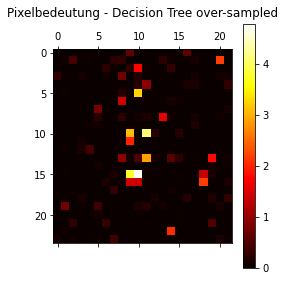

In [75]:
dt_ros_importances = dt_ros.feature_importances_.reshape(med_shape)*255
R, G, B = dt_ros_importances[:,:,0], dt_ros_importances[:,:,1], dt_ros_importances[:,:,2]
dt_ros_importances = 0.2989 * R + 0.5870 * G + 0.1140 * B

plt.matshow(dt_ros_importances, cmap = plt.cm.hot)
plt.title("Pixelbedeutung - Decision Tree over-sampled", pad = 15)
plt.colorbar()
plt.show()

<a name="rf"></a>
### 7.2 Random Forest

Nachdem die drei Datenvariationen mittels Entscheidungsbäumen untersucht wurden, erfolgt nun das selbe für den Algorithmus Random Forest.<br>
Random Forests werden aus einem Ensemble, d.h. einer Sammlung von Entscheidungsbäumen gebildet und nach der Bagging-Methode trainiert. Der Algorithmus zählt zu den mächtigsten klassischen maschinellen Lernverfahren. [4]<br>
Random Forests bzw. die Bagging-Methode im Allgemeinen können grundsätzlich besser mit unbalancierten Daten umgehen, weshalb sie als Vergleich zu einfachen Entscheidungsbäumen an dieser Stelle herangezogen werden.<br>
Bevor die Erstellung der Modelle erfolgt, wird zunächst aus der Bibliothek `scikit-learn` der `RandomForestClassifier` importiert.<br>
Das weitere Vorgehen gleicht im Wesentlichen dem im vorherigen Abschnitt.

In [76]:
from sklearn.ensemble import RandomForestClassifier

<a name="rf_unbalanced"></a>
#### 7.2.1 Unbalancierte Daten

Zunächst erfolgt die Entwicklung eines Random Forests für die unbalancierten Original-Daten.<br>
Nachdem der RandomForestClassifier erzeugt wurde, wird das Training mit den unbalancierten Trainingsdaten sowie anschließend die Vorhersage auf die Test-Inputdaten durchgeführt.

In [77]:
rf_org = RandomForestClassifier()
rf_org.fit(x_train_org,y_train_org)
rf_org_pred = rf_org.predict(x_test_org)

Der Accuracy-Wert liegt bei etwa 92% auf den unbalancierten Daten und ist damit im Vergleich zum Decision Tree leicht gestiegen.<br>

In [78]:
rf_org_acc = round(accuracy_score(y_test_org, rf_org_pred) * 100, 2)

print(f'Accuracy: {rf_org_acc} %')

Accuracy: 92.15 %


Auch in diesem Fall ist es interessant, sich das Ergebnis etwas genauer anzuschauen, da der obige Score den Anteil der korrekten Vorhersagen bezogen auf alle Datensätze wiedergibt.<br>
Beim Blick auf die Confusion-Matrix fällt wie schon zuvor bei den Decision Trees auf, dass zwar die häufig vorhandene Klasse `with_mask` nahezu vollständig vorhergesagt werden konnte - die Genauigkeit der Kategorie `mask_weared_incorrect` liegt jedoch bei 0%.

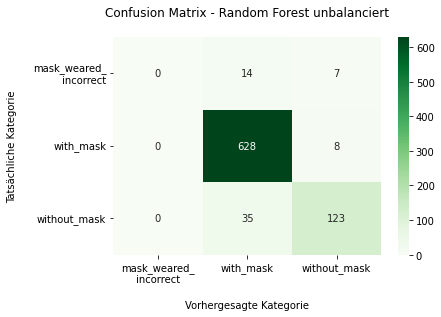

In [79]:
cfm_rf_org = confusion_matrix(y_test_org, rf_org_pred)
ax = sns.heatmap(cfm_rf_org, annot = True, fmt='', cmap= 'Greens')

ax.xaxis.set_ticklabels(['mask_weared_\nincorrect','with_mask', 'without_mask'])
ax.yaxis.set_ticklabels(['mask_weared_\nincorrect','with_mask', 'without_mask'], rotation = 0)

ax.set_title('Confusion Matrix - Random Forest unbalanciert\n')
ax.set_xlabel('\nVorhergesagte Kategorie')
ax.set_ylabel('Tatsächliche Kategorie\n');

Die Analyse der Precision-Scores ergibt folgendes Bild: in der Kategorie `masked_weared_incorrect` wurde insgesamt kein Wert vorhergesagt, wohingegen in den beiden anderen Klassen nur ein geringer Teil der Daten falsch-positiv bewertet wurde.<br>
Eine sehr hohe Trefferquote liegt bei der Kategorie `with_mask` vor.

In [80]:
rf_org_prec = precision_score(y_test_org, rf_org_pred, average=None)
rf_org_prec0 = round(rf_org_prec[0] * 100, 2)
rf_org_prec1 = round(rf_org_prec[1] * 100, 2)
rf_org_prec2 = round(rf_org_prec[2] * 100, 2)
rf_org_prec = round(precision_score(y_test_org, rf_org_pred, average='macro') * 100, 2)

print(f'Präzision Label 0: {y_train_label[0]} ---- {rf_org_prec0} %')
print(f'Präzision Label 1: {y_train_label[1]} ---------------- {rf_org_prec1} %')
print(f'Präzision Label 2: {y_train_label[2]} ------------- {rf_org_prec2} %')
print(f'Präzision insgesamt: ------------------------ {rf_org_prec} %')

Präzision Label 0: mask_weared_incorrect ---- 0.0 %
Präzision Label 1: with_mask ---------------- 92.76 %
Präzision Label 2: without_mask ------------- 89.13 %
Präzision insgesamt: ------------------------ 60.63 %


D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programme\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ein ähnliches Bild ist bei den Recall-Werten zu erkennen. Auch hier liegt der Score bei der Klasse `mask_weared_incorrect` bei 0%, die anderen beiden Kategorien weisen ebenfalls nur geringe falsch-negativ Zuordnungen auf.<br>
Die Kategorie `with_mask` erzielt hier mit fast 99% einen sehr hohen Wert.

In [81]:
rf_org_rec = recall_score(y_test_org, rf_org_pred, average=None)
rf_org_rec0 = round(rf_org_rec[0] * 100, 2)
rf_org_rec1 = round(rf_org_rec[1] * 100, 2)
rf_org_rec2 = round(rf_org_rec[2] * 100, 2)
rf_org_rec = round(recall_score(y_test_org, rf_org_pred, average='macro') * 100, 2)

print(f'Recall Label 0: {y_train_label[0]} ---- {rf_org_rec0 } %')
print(f'Recall Label 1: {y_train_label[1]} ---------------- {rf_org_rec1} %')
print(f'Recall Label 2: {y_train_label[2]} ------------- {rf_org_rec2} %')
print(f'Recall insgesamt: ------------------------ {rf_org_rec} %')

Recall Label 0: mask_weared_incorrect ---- 0.0 %
Recall Label 1: with_mask ---------------- 98.74 %
Recall Label 2: without_mask ------------- 77.85 %
Recall insgesamt: ------------------------ 58.86 %


Da sowohl Recall-, als auch Precision-Score recht ähnlich ausfallen, ist das F1-Maß equivalent dazu.<br>
Die Gesamt-Genauigkeit weicht mit etwa 59% jedoch stark vom Accuracy-Wert von 92% ab.

In [82]:
rf_org_f1 = f1_score(y_test_org, rf_org_pred, average=None)
rf_org_f10 = round(rf_org_f1[0] * 100, 2)
rf_org_f11 = round(rf_org_f1[1] * 100, 2)
rf_org_f12 = round(rf_org_f1[2] * 100, 2)
rf_org_f1 = round(f1_score(y_test_org, rf_org_pred, average='macro') * 100, 2)

print(f'F1-Score Label 0: {y_train_label[0]} ---- {rf_org_f10} %')
print(f'F1-Score Label 1: {y_train_label[1]} ---------------- {rf_org_f11} %')
print(f'F1-Score Label 2: {y_train_label[2]} ------------- {rf_org_f12} %')
print(f'F1-Score insgesamt: ------------------------ {rf_org_f1} %')

F1-Score Label 0: mask_weared_incorrect ---- 0.0 %
F1-Score Label 1: with_mask ---------------- 95.66 %
F1-Score Label 2: without_mask ------------- 83.11 %
F1-Score insgesamt: ------------------------ 59.59 %


Auch die Analyse der Pixelrelevanz spiegelt dies wieder.<br>
Es ist klar eine hohe Relevanz im Bereich der Gesichtsmaske erkennbar - jedoch keine erhöhte Relevanz bspw. auf Höhe der Nase, woran eine nicht korrekt getragene Maske erkannt werden kann.

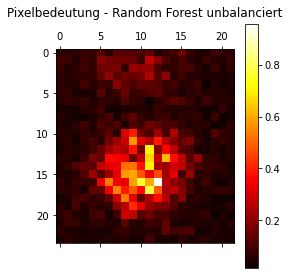

In [83]:
rf_org_importances = rf_org.feature_importances_.reshape(med_shape)*255
R, G, B = rf_org_importances[:,:,0], rf_org_importances[:,:,1], rf_org_importances[:,:,2]
rf_org_importances = 0.2989 * R + 0.5870 * G + 0.1140 * B

plt.matshow(rf_org_importances, cmap = plt.cm.hot)
plt.title("Pixelbedeutung - Random Forest unbalanciert", pad = 15)
plt.colorbar()
plt.show()

<a name="rf_under-sampled"></a>
#### 7.2.2 Under-Sampling Daten

Wie bei den Entscheidungsbäumen erfolgt nun auch beim Random Forest das Training eines Modells mit den Under-Sampling Daten.<br>
Dazu wird erneut ein `RandomForestClassifier` erzeugt und auf die entsprechenden Datensätze trainiert, bevor er anschließend Vorhersagen trifft.

In [84]:
rf_rus = RandomForestClassifier()
rf_rus.fit(x_train_rus,y_train_rus)
rf_rus_pred = rf_rus.predict(x_test_rus)

Verglichen mit dem Accuracy-Score auf den unbalancierten Daten sinkt dieser nun wieder, erreicht aber mit 81% eine höhere Genauigkeit als der under-sampled Decision Tree.

In [85]:
rf_rus_acc = round(accuracy_score(y_test_rus, rf_rus_pred) * 100, 2)

print(f'Accuracy: {rf_rus_acc} %')

Accuracy: 80.95 %


Die Confusion-Matrix wirkt auf den ersten Blick sehr ausgeglichen.<br>
Es werden die höchsten Werte bei den korrekten Vorhersagen aller Kategorien erzielt, jedoch existieren in einigen Bereichen auch Abweichungen in Form von falschen negativen sowie falschen positiven Prognosen.

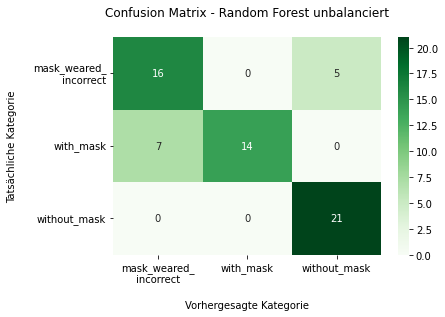

In [86]:
cfm_rf_rus = confusion_matrix(y_test_rus, rf_rus_pred)
ax = sns.heatmap(cfm_rf_rus, annot = True, fmt='', cmap= 'Greens')

ax.xaxis.set_ticklabels(['mask_weared_\nincorrect','with_mask', 'without_mask'])
ax.yaxis.set_ticklabels(['mask_weared_\nincorrect','with_mask', 'without_mask'], rotation = 0)

ax.set_title('Confusion Matrix - Random Forest unbalanciert\n')
ax.set_xlabel('\nVorhergesagte Kategorie')
ax.set_ylabel('Tatsächliche Kategorie\n');

Die Präzisionswerte zeigen, dass vor allem die in den Original-Daten unterrepräsentierte Kategorie `mask_weared_incorrect` an korrekten Vorhersagen, im Verhältnis zu falsch-positiven Vorhersagen, zugenommen hat.<br>
Aber auch die anderen Kategorien erzielen eine höhere Genauigkeit verglichen mit dem Ergebnis beim Decision Tree.

In [87]:
rf_rus_prec = precision_score(y_test_rus, rf_rus_pred, average=None)
rf_rus_prec0 = round(rf_rus_prec[0] * 100, 2)
rf_rus_prec1 = round(rf_rus_prec[1] * 100, 2)
rf_rus_prec2 = round(rf_rus_prec[2] * 100, 2)
rf_rus_prec = round(precision_score(y_test_rus, rf_rus_pred, average='macro') * 100, 2)

print(f'Präzision Label 0: {y_train_label[0]} ---- {rf_rus_prec0} %')
print(f'Präzision Label 1: {y_train_label[1]} ---------------- {rf_rus_prec1} %')
print(f'Präzision Label 2: {y_train_label[2]} ------------- {rf_rus_prec2} %')
print(f'Präzision insgesamt: ------------------------ {rf_rus_prec} %')

Präzision Label 0: mask_weared_incorrect ---- 69.57 %
Präzision Label 1: with_mask ---------------- 100.0 %
Präzision Label 2: without_mask ------------- 80.77 %
Präzision insgesamt: ------------------------ 83.44 %


Die Ergebnisse bei den falsch-negativen Prognosen enthalten eine interessante Veränderung: es werden insgesamt weniger Daten der Klasse `without_mask` fälschlicherweise als negativ kategorisiert, als solche der Klasse `with_mask`. Hier besteht für den Algorithmus offenbar vor allem ein Problem der Verwechslung mit der Kategorie `mask_weared_incorrect`.

In [88]:
rf_rus_rec = recall_score(y_test_rus, rf_rus_pred, average=None)
rf_rus_rec0 = round(rf_rus_rec[0] * 100, 2)
rf_rus_rec1 = round(rf_rus_rec[1] * 100, 2)
rf_rus_rec2 = round(rf_rus_rec[2] * 100, 2)
rf_rus_rec = round(recall_score(y_test_rus, rf_rus_pred, average='macro') * 100, 2)

print(f'Recall Label 0: {y_train_label[0]} ---- {rf_rus_rec0} %')
print(f'Recall Label 1: {y_train_label[1]} ---------------- {rf_rus_rec1} %')
print(f'Recall Label 2: {y_train_label[2]} ------------- {rf_rus_rec2} %')
print(f'Recall insgesamt: ------------------------ {rf_rus_rec} %')

Recall Label 0: mask_weared_incorrect ---- 76.19 %
Recall Label 1: with_mask ---------------- 66.67 %
Recall Label 2: without_mask ------------- 100.0 %
Recall insgesamt: ------------------------ 80.95 %


Bildet man mit dem F1-Score den gewichteten Mittelwert der vorherigen Werte ab ist zu erkennen, dass in jeder Kategorie eine Genauigkeit von über 70% erreicht werden kann.<br>
Auch im gesamten Ergebnis ist nun die Kategorie mit dem Label `without_mask` am sichersten in der Vorhersage, da Daten aus `with_mask` vermehrt mit der Kategorie `mask_weared_incorrect` vertauscht wurden.

In [89]:
rf_rus_f1 = f1_score(y_test_rus, rf_rus_pred, average=None)
rf_rus_f10 = round(rf_rus_f1[0] * 100, 2)
rf_rus_f11 = round(rf_rus_f1[1] * 100, 2)
rf_rus_f12 = round(rf_rus_f1[2] * 100, 2)
rf_rus_f1 = round(f1_score(y_test_rus, rf_rus_pred, average='macro') * 100, 2)

print(f'F1-Score Label 0: {y_train_label[0]} ---- {rf_rus_f10} %')
print(f'F1-Score Label 1: {y_train_label[1]} ---------------- {rf_rus_f11} %')
print(f'F1-Score Label 2: {y_train_label[2]} ------------- {rf_rus_f12} %')
print(f'F1-Score insgesamt: ------------------------ {rf_rus_f1} %')

F1-Score Label 0: mask_weared_incorrect ---- 72.73 %
F1-Score Label 1: with_mask ---------------- 80.0 %
F1-Score Label 2: without_mask ------------- 89.36 %
F1-Score insgesamt: ------------------------ 80.7 %


Die Auswertung der Pixelbedeutungen ergeben ein interessantes Bild.<br>
Es ist eine erhöhte Relevanz im Bereich der Bildmitte vorhanden, also dort, wo sich eine Gesichtsmaske in der Regel auf den Bildern befindet. Es sind jedoch vermehrt relevante Pixel etwas nach oben versetzt erkennbar. Dies lässt darauf schließen, dass dort die Bedeckung der Nase mit einer Maske als ein Entscheidungskriterium, ob eine Person eine Maske korrekt trägt, erkannt wird.

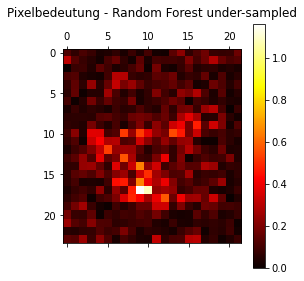

In [90]:
rf_rus_importances = rf_rus.feature_importances_.reshape(med_shape)*255
R, G, B = rf_rus_importances[:,:,0], rf_rus_importances[:,:,1], rf_rus_importances[:,:,2]
rf_rus_importances = 0.2989 * R + 0.5870 * G + 0.1140 * B

plt.matshow(rf_rus_importances, cmap = plt.cm.hot)
plt.title("Pixelbedeutung - Random Forest under-sampled", pad = 15)
plt.colorbar()
plt.show()

<a name="rf_over-sampled"></a>
#### 7.2.3 Over-Sampling Daten

Abschließend wird erneut ein Klassifikator in Form eines Random Forest erzeugt, diesmal jedoch mit den Over-Sampling-Daten.<br>

In [91]:
rf_ros = RandomForestClassifier()
rf_ros.fit(x_train_ros,y_train_ros)
rf_ros_pred = rf_ros.predict(x_test_ros)

Der Accuracy-Score beträgt in diesem Fall etwa 60%.

In [92]:
rf_ros_acc = round(accuracy_score(y_test_ros, rf_ros_pred) * 100, 2)

print(f'Accuracy: {rf_ros_acc} %')

Accuracy: 60.48 %


Die Confusion-Matrix zeigt, dass vor allem in den Kategorien `mask_weared_incorrect` sowie `with_mask` große Abweichungen vorhanden sind.<br>
Ähnlich, wie es sich bei den under-sampled-Modell schon angedeutet hat, scheint das Modell hier vermehrt Probleme bei der korrekten Klassifikation zu haben.

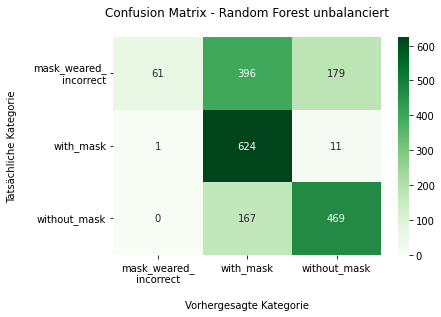

In [93]:
cfm_rf_ros = confusion_matrix(y_test_ros, rf_ros_pred)
ax = sns.heatmap(cfm_rf_ros, annot = True, fmt='', cmap= 'Greens')

ax.xaxis.set_ticklabels(['mask_weared_\nincorrect','with_mask', 'without_mask'])
ax.yaxis.set_ticklabels(['mask_weared_\nincorrect','with_mask', 'without_mask'], rotation = 0)

ax.set_title('Confusion Matrix - Random Forest unbalanciert\n')
ax.set_xlabel('\nVorhergesagte Kategorie')
ax.set_ylabel('Tatsächliche Kategorie\n');

Durch die Analyse der Precision-Werte zeigt sich das oben genannte Problem.<br>
Die Klasse `mask_weared_incorrect` enthält zwar nur sehr wenige falsch-positive Prognosen und erreicht daher einen Score von knapp 98%. Dafür werden der Klasse `with_mask` verstärkt falsch-positive Klassifikationen zugeordnet, weshalb hier nur eine Präzision von ca. 52% erreicht wird.

In [94]:
rf_ros_prec = precision_score(y_test_ros, rf_ros_pred, average=None)
rf_ros_prec0 = round(rf_ros_prec[0] * 100, 2)
rf_ros_prec1 = round(rf_ros_prec[1] * 100, 2)
rf_ros_prec2 = round(rf_ros_prec[2] * 100, 2)
rf_ros_prec = round(precision_score(y_test_ros, dt_ros_pred, average='macro') * 100, 2)

print(f'Präzision Label 0: {y_train_label[0]} ---- {rf_ros_prec0} %')
print(f'Präzision Label 1: {y_train_label[1]} ---------------- {rf_ros_prec1} %')
print(f'Präzision Label 2: {y_train_label[2]} ------------- {rf_ros_prec2} %')
print(f'Präzision insgesamt: ------------------------ {rf_ros_prec} %')

Präzision Label 0: mask_weared_incorrect ---- 98.39 %
Präzision Label 1: with_mask ---------------- 52.57 %
Präzision Label 2: without_mask ------------- 71.17 %
Präzision insgesamt: ------------------------ 64.88 %


Der Recall-Score stellt die Problematik von der anderen Seite dar: durch die vielen falsch-negativen Klassifikationen wird der Score der Klasse `mask_weared_incorrect` stark nach unten gezogen und beträgt nur noch knapp 10%, wohingegen die Klasse `with_mask` nun ca. 98% Genauigkeit aufweist.

In [95]:
rf_ros_rec = recall_score(y_test_ros, rf_ros_pred, average=None)
rf_ros_rec0 = round(rf_ros_rec[0] * 100, 2)
rf_ros_rec1 = round(rf_ros_rec[1] * 100, 2)
rf_ros_rec2 = round(rf_ros_rec[2] * 100, 2)
rf_ros_rec = round(recall_score(y_test_ros, rf_ros_pred, average='macro') * 100, 2)

print(f'Recall Label 0: {y_train_label[0]} ---- {rf_ros_rec0} %')
print(f'Recall Label 1: {y_train_label[1]} ---------------- {rf_ros_rec1} %')
print(f'Recall Label 2: {y_train_label[2]} ------------- {rf_ros_rec2} %')
print(f'Recall insgesamt: ------------------------ {rf_ros_rec} %')

Recall Label 0: mask_weared_incorrect ---- 9.59 %
Recall Label 1: with_mask ---------------- 98.11 %
Recall Label 2: without_mask ------------- 73.74 %
Recall insgesamt: ------------------------ 60.48 %


Mit der Abbildung des gewichteten Mittelwerts durch das F1-Maß ist ersichtlich, dass die häufige Verwechslung zwischen Label 0 und Label 1 dazu geführt hat, dass nur Genauigkeiten von 17% bzw. 72% erreicht werden.<br>

In [96]:
rf_ros_f1 = f1_score(y_test_ros, rf_ros_pred, average=None)
rf_ros_f10 = round(rf_ros_f1[0] * 100, 2)
rf_ros_f11 = round(rf_ros_f1[1] * 100, 2)
rf_ros_f12 = round(rf_ros_f1[2] * 100, 2)
rf_ros_f1 = round(f1_score(y_test_ros, rf_ros_pred, average='macro') * 100, 2)

print(f'F1-Score Label 0: {y_train_label[0]} ---- {rf_ros_f10} %')
print(f'F1-Score Label 1: {y_train_label[1]} ---------------- {rf_ros_f11} %')
print(f'F1-Score Label 2: {y_train_label[2]} ------------- {rf_ros_f12} %')
print(f'F1-Score insgesamt: ------------------------ {rf_ros_f1} %')

F1-Score Label 0: mask_weared_incorrect ---- 17.48 %
F1-Score Label 1: with_mask ---------------- 68.46 %
F1-Score Label 2: without_mask ------------- 72.43 %
F1-Score insgesamt: ------------------------ 52.79 %


Die relevanten Pixel im Bereich der Bildmitte sind verglichen mit dem under-sampled-Modell leicht reduziert, dafür sind die Relevanzen nicht mehr so sehr über das Gesamtbild verstreut wie zuvor.<br>
Aber auch hier lässt sich eine Konzentration der Bedeutung im Bereich einer Gesichtsmaske erkennen.

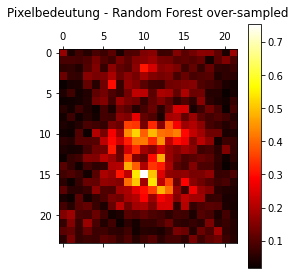

In [97]:
rf_ros_importances = rf_ros.feature_importances_.reshape(med_shape)*255
R, G, B = rf_ros_importances[:,:,0], rf_ros_importances[:,:,1], rf_ros_importances[:,:,2]
rf_ros_importances = 0.2989 * R + 0.5870 * G + 0.1140 * B

plt.matshow(rf_ros_importances, cmap = plt.cm.hot)
plt.title("Pixelbedeutung - Random Forest over-sampled", pad = 15)
plt.colorbar()
plt.show()

<a name="evaluation"></a>
## 8. Evaluation der Ergebnisse

In diesem Kapitel geht es nun darum, die zuvor festgestellten Messwerte und Ergebnisse zu evaluieren und ein Fazit zu ziehen.<br>
Dazu werden die ermittelten Scores der Metriken für die beiden maschinellen Lernverfahren, Decision Tree und Random Forest, in Diagrammen miteinander verglichen.

Zunächst erfolgt die Auswertung der erzielten Accuracy-Scores.<br>
Im unten stehenden Diagramm werden diese nach Algorithmus sowie der jeweils verwendeten Datenbasis differenziert.

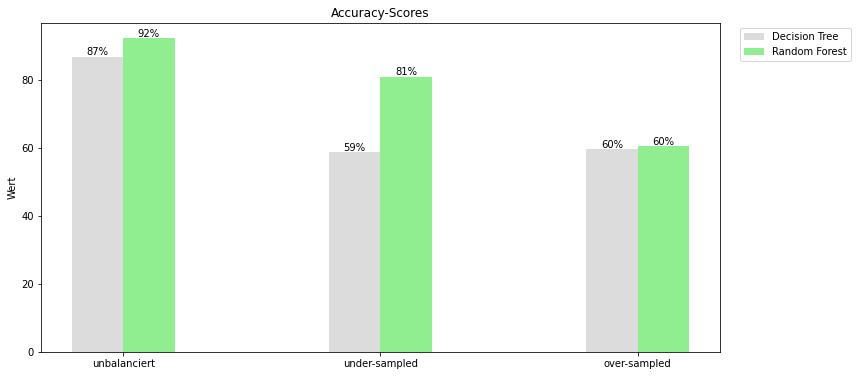

In [98]:
bar_labels = ['unbalanciert', 'under-sampled', 'over-sampled']
dt_accs = [dt_org_acc, dt_rus_acc, dt_ros_acc]
rf_accs = [rf_org_acc, rf_rus_acc, rf_ros_acc]

x = np.arange(len(bar_labels))

fig, ax = plt.subplots(figsize=(10, 5))
fig.tight_layout(pad=0.5, w_pad=2.0, h_pad=3.0)

ax_dt_acc = ax.bar(x - 0.1, dt_accs, width = 0.2, label='Decision Tree', tick_label = dt_accs, color='gainsboro')
ax_rf_acc = ax.bar(x + 0.1, rf_accs, width = 0.2, label='Random Forest', tick_label = rf_accs, color = 'lightgreen')

plt.xticks(x, bar_labels)
plt.ylabel("Wert")
plt.title("Accuracy-Scores")
plt.legend(bbox_to_anchor =(1.2,1))
ax.bar_label(ax_dt_acc, fmt = '%.f%%')
ax.bar_label(ax_rf_acc, fmt = '%.f%%')

plt.show()

Das Diagramm zeigt, dass die unbalancierten beiden Algorithmen jeweils die höchsten Accuracy-Werte erbringen.<br>
Die Under-Sampled-Daten erzielen beim Decision Tree nur einen ähnlichen Wert wie die Over-Sampled-Daten, dennoch ist der Unterschied zu den Original-Daten mit 27% sehr hoch.<br>
Interessant zu sehen ist, dass der Random Forest Algorithmus die under-sampled-Daten deutlich besser verarbeiten kann als der Decision Tree. Bei der Over-Sampled-Variante ist allerdings nur ein ähnlich niedriger Score erzielt worden.<br><br>
Wie allerdings im vorherigen Kapitel festzustellen war, sollte zur Bewertung der Qualität eines Lernverfahrens nicht nur der Accuracy-Score herangezogen werden. Es sind für eine fundierte Evaluation einige weitere Metriken zu betrachten, da die erzielte Accuracy allein nicht aussagekräftig ist.

Folgend werden nun zunächst die Messergebnisse für den Decision Tree Algorithmus gegenübergestellt und analysiert.<br>
Es werden alle erzielten Scores in jeweils separaten Diagrammen für jede Metrik dargestellt, d.h. zuerst für die Precision-Scores, anschließend für die Recall-Werte sowie für das F1-Maß.

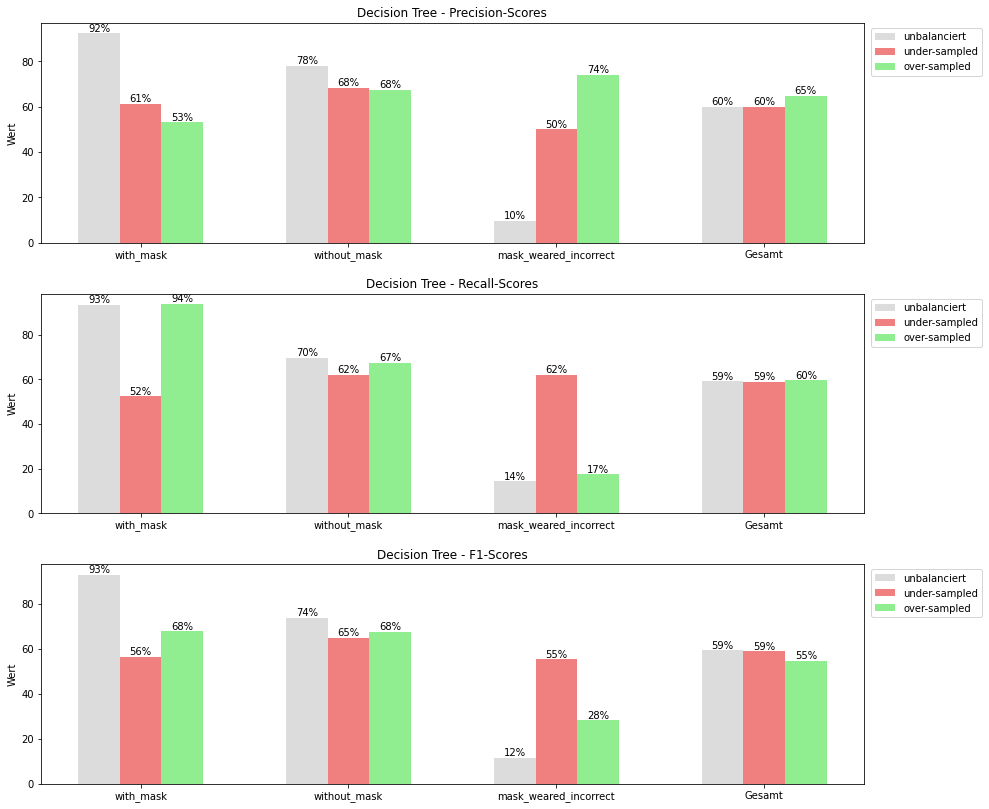

In [99]:
bar_labels = ['with_mask', 'without_mask', 'mask_weared_incorrect', 'Gesamt']
dt_org_precs = [dt_org_prec1, dt_org_prec2, dt_org_prec0, dt_org_prec]
dt_rus_precs = [dt_rus_prec1, dt_rus_prec2, dt_rus_prec0, dt_rus_prec]
dt_ros_precs = [dt_ros_prec1, dt_ros_prec2, dt_ros_prec0, dt_ros_prec]
dt_org_recs = [dt_org_rec1, dt_org_rec2, dt_org_rec0, dt_org_rec]
dt_rus_recs = [dt_rus_rec1, dt_rus_rec2, dt_rus_rec0, dt_rus_rec]
dt_ros_recs = [dt_ros_rec1, dt_ros_rec2, dt_ros_rec0, dt_ros_rec]
dt_org_f1s = [dt_org_f11, dt_org_f12, dt_org_f10, dt_org_f1]
dt_rus_f1s = [dt_rus_f11, dt_rus_f12, dt_rus_f10, dt_rus_f1]
dt_ros_f1s = [dt_ros_f11, dt_ros_f12, dt_ros_f10, dt_ros_f1]

dt_accs = [dt_org_acc, dt_rus_acc, dt_ros_acc]

x = np.arange(len(bar_labels))

fig, axs = plt.subplots(3, 1, figsize=(12, 11))
ax1, ax2, ax3 = axs.flat
fig.tight_layout(pad=0.5, w_pad=2.0, h_pad=3.0)

ax_dt_org_precs = ax1.bar(x - 0.20, dt_org_precs, width = 0.2, label='unbalanciert', 
                         tick_label = dt_org_precs, color='gainsboro')
ax_dt_rus_precs = ax1.bar(x, dt_rus_precs, width = 0.2, label='under-sampled', 
                         tick_label = dt_rus_precs, color='lightcoral')
ax_dt_ros_precs = ax1.bar(x + 0.20, dt_ros_precs, width = 0.2, label='over-sampled', 
                         tick_label = dt_ros_precs, color='lightgreen')
ax_dt_org_recs = ax2.bar(x - 0.2, dt_org_recs, width = 0.2, label='unbalanciert', 
                         tick_label = dt_org_recs, color='gainsboro')
ax_dt_rus_recs = ax2.bar(x, dt_rus_recs, width = 0.2, label='under-sampled', 
                         tick_label = dt_rus_recs, color='lightcoral')
ax_dt_ros_recs = ax2.bar(x + 0.2, dt_ros_recs, width = 0.2, label='over-sampled', 
                         tick_label = dt_ros_recs, color='lightgreen')
ax_dt_org_f1s = ax3.bar(x - 0.2, dt_org_f1s, width = 0.2, label='unbalanciert', 
                         tick_label = dt_org_f1s, color='gainsboro')
ax_dt_rus_f1s = ax3.bar(x, dt_rus_f1s, width = 0.2, label='under-sampled', 
                         tick_label = dt_rus_f1s, color='lightcoral')
ax_dt_ros_f1s = ax3.bar(x + 0.2, dt_ros_f1s, width = 0.2, label='over-sampled', 
                         tick_label = dt_ros_f1s, color='lightgreen')

ax1.set_xticks(x, bar_labels)
ax2.set_xticks(x, bar_labels)
ax3.set_xticks(x, bar_labels)
ax1.set_ylabel("Wert")
ax2.set_ylabel("Wert")
ax3.set_ylabel("Wert")
ax1.set_title("Decision Tree - Precision-Scores")
ax2.set_title("Decision Tree - Recall-Scores")
ax3.set_title("Decision Tree - F1-Scores")
ax1.legend(bbox_to_anchor =(1.15,1))
ax2.legend(bbox_to_anchor =(1.15,1))
ax3.legend(bbox_to_anchor =(1.15,1))
ax1.bar_label(ax_dt_org_precs, fmt = '%.f%%')
ax2.bar_label(ax_dt_org_recs, fmt = '%.f%%')
ax3.bar_label(ax_dt_org_f1s, fmt = '%.f%%')
ax1.bar_label(ax_dt_rus_precs, fmt = '%.f%%')
ax2.bar_label(ax_dt_rus_recs, fmt = '%.f%%')
ax3.bar_label(ax_dt_rus_f1s, fmt = '%.f%%')
ax1.bar_label(ax_dt_ros_precs, fmt = '%.f%%')
ax2.bar_label(ax_dt_ros_recs, fmt = '%.f%%')
ax3.bar_label(ax_dt_ros_f1s, fmt = '%.f%%')

plt.show()

Schauen wir zunächst auf die Präzisionswerte: <br>
Für die Kategorien `with_mask` und `without_mask` ist hier bei den unbalancierten Daten die höchste Wertung erreicht worden. Dies liegt daran, dass für diese beiden Kategorien ein deutlich höherer Anteil an gelabelten Daten für das Training vorhanden war. Die unterrepräsentierte Klasse `masked_weared_incorrect` fällt hier deutlich ab.<br>
Wird nun das Under- bzw. Over-Sampling angewendet, sinkt in den beiden stark repräsentierten Kategorien die Präzision, wohingegen sie bei der Klasse `masked_weared_incorrect` deutlich ansteigt.<br>
Die Gesamtpräzision ist insgesamt relativ ausgeglichen und liegt in etwa zwischen 60% und 65%.<br>

Die Auswertung der Recall-Scores liefert ein interessantes Bild:<br>
Während die Scores bei der unbalancierten Daten sehr nah an den Präzisionswerten liegen, ergibt sich für die mit under- und over-sampled Daten trainierten Decision Trees ein abweichendes Bild.<br>
Bei den under-sampled Daten steigt der Recall-Wert mit absteigender Anzahl an ursprünglich vorhandenen Datenpunkten zu den Klassen an, wohingegen die Precision-Scores leicht abfallen. Es werden also für die Kategorien, die durch das Under-Sampling viele Daten verloren haben, häufiger falsch-negative Vorhersagen getroffen, d.h. vermehrt Datenpunkte anderen Klassen zugeordnet. Umgekehrt werden in den Klassen, die ursprünglich die meisten Daten beinhalteten, trotz Datenreduktion weiterhin die wenigsten falsch-positiven Zuordnungen vorgenommen und somit weniger Datenpunkte fälschlicherweise als zugehörig klassifiziert. Dadurch verhält sich das F1-Maß auch relativ ausgeglichen. Es ist erkennbar, dass die Klasse `with_mask`, die die meisten Datenverluste erlitten hat, hier nun sogar einen geringen Wert erreicht als die Kategorie `masked_weared_incorrect`. Am stärksten ist nun, wenn auch nur minimal besser, die Klasse `without_mask`, die zwar auch Daten verloren hat, aber offenbar nicht so viele relevante Merkmale wie bei `with_mask`.<br>
Der over-sampled Decision Tree zeigt genau das Gegenteil zum under-sampled Decision Tree. Hier sinkt der Recall-Wert in Abhängigkeit von den ursprünglich vorhandenen Datenpunkten deutlich von Klasse zu Klasse, wohingegen der Precision-Score steigt.<br>

Vergleicht man die einzelnen Kategorien anhand der erzielten Werte kann festgestellt werden, dass die Klasse `without_mask` relativ ausgeglichen wirkt. Die Abweichungen zwischen Präzision und Recall betragen sind hier sehr gering.<br>
Die Klassen `with_mask` und `without_mask` hingegen weisen deutlich größere Schwankungen auf. Es ist erkennbar, dass ein hoher Präzisionswert in der einen Klasse einen hohen Recall-Wert der anderen erzeugt und umgekehrt.<br>
Die Klasse `without_mask` scheint von den Decision Trees über alle Datengrundlagen konstant klassifierbar zu sein. Zwischen `with_mask` und `without_mask` ist die Klassifizierung offenbar deutlich schwieriger möglich. Dies erscheint einleuchtend, da hier nur wenige Pixel darüber entscheiden, ob eine vorhandene Maske korrekt getragen wird und eine Unterscheidung daher für den Algorithmus wesentlich schwieriger zu erlernen ist.

Nachfolgend sind nun die Korrelationen zwischen den Metriken für die drei Decision Trees in einer Korrelationsmatrix dargestellt.<br>
Die Zahlen stellen die sogenannten Korrelationskoeffizienten dar, die zwischen 1 und -1 liegen können. 1 bedeutet hierbei eine perfekt-positive Korrelation, d.h. das Steigen bzw. Fallen eines Wertes sorgt dafür, dass dies so auch beim anderen geschieht. Liegt der Koeffizient hingegen bei -1 besteht eine perfekt-negative Korrelation. In diesem Fall führt das Steigen bzw. Fallen eines Wertes zu einer genau gegensätzlichen Reaktion des anderen Wertes.<br>

Der Decision Tree der unbalancierten Daten ist recht unspektakulär und weist zwischen allen Metriken nahezu perfekt-positive Korrelationen auf. Eine steigende Präzision bedingt hierbei einen steigenden Recall-Wert.<br>
Die Matrix für under- und over-sampled hingegen enthält jeweils negative Korrelationen. Dies bestätigt den Eindruck aus den vorherigen Diagrammen. Beim under-sampled Decision Tree erzeugt daher ein steigender Recall-Wert einen fallenden Präzisionswert. Zudem beeinflusst die Präzision das F1-Maß nur sehr gering, da die Korrelation zwischen Recall und F1 im Vergleich wesentlich höher ist. Auch beim over-sampled Decision Tree besteht eine hohe negative Korrelation zwischen Recall und Precision. Hier ist allerdings sogar die Korrelation zwischen Präzision und F1-Maß negativ - eine sinkende Präzision erhöht daher den F1-Score. Umgekehrt ist dies beim Recall-Wert, hier führt eine Erhöhung des Scores zu einem höheren F1-Maß.

In [100]:
dt_org_corr = {'Precision' : pd.Series(dt_org_precs), 'Recall' : pd.Series(dt_org_recs), 'F1' : pd.Series(dt_org_f1s)}
dt_rus_corr = {'Precision' : pd.Series(dt_rus_precs), 'Recall' : pd.Series(dt_rus_recs), 'F1' : pd.Series(dt_rus_f1s)}
dt_ros_corr = {'Precision' : pd.Series(dt_ros_precs), 'Recall' : pd.Series(dt_ros_recs), 'F1' : pd.Series(dt_ros_f1s)}
dt_org_corr = pd.DataFrame(dt_org_corr).corr()
dt_rus_corr = pd.DataFrame(dt_rus_corr).corr()
dt_ros_corr = pd.DataFrame(dt_ros_corr).corr()

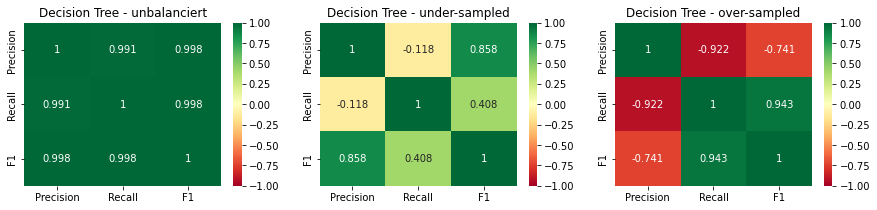

In [101]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,3))

sns.heatmap(dt_org_corr, annot = True, fmt = '.3g', cmap = 'RdYlGn', ax=ax1, vmin = -1, vmax = 1)
sns.heatmap(dt_rus_corr, annot = True, fmt = '.3g', cmap = 'RdYlGn', ax=ax2, vmin = -1, vmax = 1)
sns.heatmap(dt_ros_corr, annot = True, fmt = '.3g', cmap = 'RdYlGn', ax=ax3, vmin = -1, vmax = 1)
ax1.set_title('Decision Tree - unbalanciert')
ax2.set_title('Decision Tree - under-sampled')
ax3.set_title('Decision Tree - over-sampled')

plt.show()

Nachdem die Ergebnisse der Decision Trees evaluiert wurden, folgt nun die Analyse der Random Forest Algorithmen. Die Vorgehensweise ist hierbei identisch. Zunächst folgt die Darstellung der Metriken unterteilt in separaten Diagrammen.

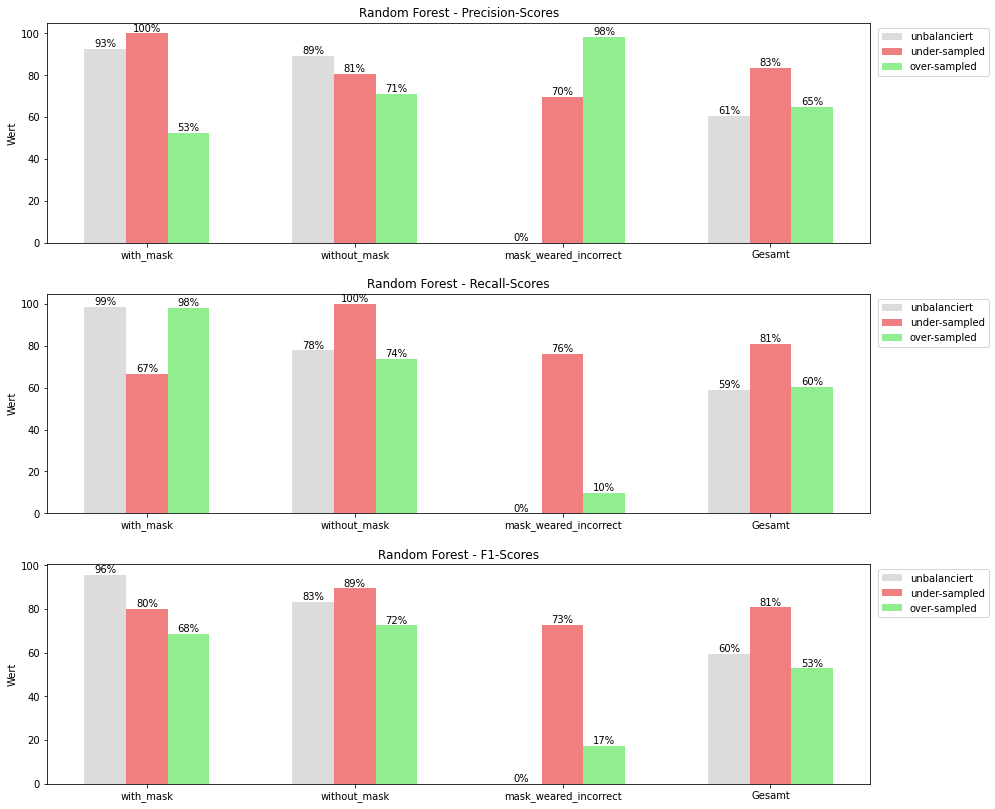

In [102]:
bar_labels = ['with_mask', 'without_mask', 'mask_weared_incorrect', 'Gesamt']
rf_org_precs = [rf_org_prec1, rf_org_prec2, rf_org_prec0, rf_org_prec]
rf_rus_precs = [rf_rus_prec1, rf_rus_prec2, rf_rus_prec0, rf_rus_prec]
rf_ros_precs = [rf_ros_prec1, rf_ros_prec2, rf_ros_prec0, rf_ros_prec]
rf_org_recs = [rf_org_rec1, rf_org_rec2, rf_org_rec0, rf_org_rec]
rf_rus_recs = [rf_rus_rec1, rf_rus_rec2, rf_rus_rec0, rf_rus_rec]
rf_ros_recs = [rf_ros_rec1, rf_ros_rec2, rf_ros_rec0, rf_ros_rec]
rf_org_f1s = [rf_org_f11, rf_org_f12, rf_org_f10, rf_org_f1]
rf_rus_f1s = [rf_rus_f11, rf_rus_f12, rf_rus_f10, rf_rus_f1]
rf_ros_f1s = [rf_ros_f11, rf_ros_f12, rf_ros_f10, rf_ros_f1]

x = np.arange(len(bar_labels))

fig, axs = plt.subplots(3, 1, figsize=(12, 11))
ax1, ax2, ax3 = axs.flat
fig.tight_layout(pad=0.5, w_pad=2.0, h_pad=3.0)

ax_rf_org_precs = ax1.bar(x - 0.20, rf_org_precs, width = 0.2, label='unbalanciert', 
                         tick_label = rf_org_precs, color='gainsboro')
ax_rf_rus_precs = ax1.bar(x, rf_rus_precs, width = 0.2, label='under-sampled', 
                         tick_label = rf_rus_precs, color='lightcoral')
ax_rf_ros_precs = ax1.bar(x + 0.20, rf_ros_precs, width = 0.2, label='over-sampled', 
                         tick_label = rf_ros_precs, color='lightgreen')
ax_rf_org_recs = ax2.bar(x - 0.2, rf_org_recs, width = 0.2, label='unbalanciert', 
                         tick_label = rf_org_recs, color='gainsboro')
ax_rf_rus_recs = ax2.bar(x, rf_rus_recs, width = 0.2, label='under-sampled', 
                         tick_label = rf_rus_recs, color='lightcoral')
ax_rf_ros_recs = ax2.bar(x + 0.2, rf_ros_recs, width = 0.2, label='over-sampled', 
                         tick_label = rf_ros_recs, color='lightgreen')
ax_rf_org_f1s = ax3.bar(x - 0.2, rf_org_f1s, width = 0.2, label='unbalanciert', 
                         tick_label = rf_org_f1s, color='gainsboro')
ax_rf_rus_f1s = ax3.bar(x, rf_rus_f1s, width = 0.2, label='under-sampled', 
                         tick_label = rf_rus_f1s, color='lightcoral')
ax_rf_ros_f1s = ax3.bar(x + 0.2, rf_ros_f1s, width = 0.2, label='over-sampled', 
                         tick_label = rf_ros_f1s, color='lightgreen')

ax1.set_xticks(x, bar_labels)
ax2.set_xticks(x, bar_labels)
ax3.set_xticks(x, bar_labels)
ax1.set_ylabel("Wert")
ax2.set_ylabel("Wert")
ax3.set_ylabel("Wert")
ax1.set_title("Random Forest - Precision-Scores")
ax2.set_title("Random Forest - Recall-Scores")
ax3.set_title("Random Forest - F1-Scores")
ax1.legend(bbox_to_anchor =(1.15,1))
ax2.legend(bbox_to_anchor =(1.15,1))
ax3.legend(bbox_to_anchor =(1.15,1))
ax1.bar_label(ax_rf_org_precs, fmt = '%.f%%')
ax2.bar_label(ax_rf_org_recs, fmt = '%.f%%')
ax3.bar_label(ax_rf_org_f1s, fmt = '%.f%%')
ax1.bar_label(ax_rf_rus_precs, fmt = '%.f%%')
ax2.bar_label(ax_rf_rus_recs, fmt = '%.f%%')
ax3.bar_label(ax_rf_rus_f1s, fmt = '%.f%%')
ax1.bar_label(ax_rf_ros_precs, fmt = '%.f%%')
ax2.bar_label(ax_rf_ros_recs, fmt = '%.f%%')
ax3.bar_label(ax_rf_ros_f1s, fmt = '%.f%%')

plt.show()

Die Auswertung des unbalancierten Random Forest sieht sehr ähnlich zu der des unbalancierten Decision Trees aus. Je mehr Daten für das Training einer Klasse vorhanden sind, desto höher ist in dieser auch der Score. Während die Werte für `with_mask` und `without_mask` im Vergleich zum Decision Tree leicht gestiegen sind, wird nun allerdings in der Klasse `mask_weared_incorrect` kein einziger Datensatz korrekt klassifiziert.<br>
Auch beim under-sampled Random Forest sinkt in Abhängig von zuvor vorhandenen Daten wieder die Präzision, was ebenfalls vergleichbar mit dem entsprechendem Decision Tree ist. Die Recall-Werte verhalten sich nun allerdings ein wenig anders. Der Score der Klasse `mask_weared_incorrect` ist verglichen mit der Präzision leicht reduziert. Die Klasse `with_mask` verliert sogar relativ deutlich an Wert, wohingegen 100% der Daten der Klasse `without_mask` korrekt klassifiziert werden. Dies bedeutet, dass weniger falsch-negative Klassifizierungen bei `without_mask` zu mehr falsch-negativen Vohersagen in beiden anderen Klassen führen.<br>
Bei den under-sampled Daten steigt die Präzision entgegengesetzt zu den unbalancierten bzw. dem under-sampled Algorithmus an. Dies war bei den Decision Tree Modellen ebenfalls so. Auch das Verhalten der Recall-Scores ist vergleichbar mit denen beim Decision Tree - allerdings wird nun bei der Klasse `mask_weared_incorrect` nur noch ein geringer Recall-Score von 10% erreicht - es werden also fast alle falsch getragenen Masken anderen Klassen zugeordnet. <br>
Beim under-sampled Random Forest ist wieder erkennbar, dass die Klassen `mask_weared_incorrect` und `with_mask` miteinander in Beziehung stehen und sich gegenseitig beeinflussen. Ein hoher Recall-Wert in der einen Klasse bedingt einen niedrigeren in der anderen, ebenso verhält sich die Entwicklung bei der Präzision.<br>

Der abschließende Blick auf die Korrelationsmatrizen zeigt, dass auch beim Random Forest im Falle der unbalancierten Daten alle Metriken nahezu perfekt positiv miteinander korrelieren.<br>
Beim under-sampled Random Forest wiederum besitzen Recall und Precision nur eine negative Korrelation. Durch den Einfluss des Recall-Wertes auf das F1-Maß ist zudem auch die Korrelation zwischen Precision und F1-Score reduziert.<br>
Das Over-Sampling führt wie schon beim Decision Tree zu sehr starken Korrelationen. Wie bereits erwähnt, führt ein niedriger bzw. höherer Wert bei Recall zur gegensätzlichen Entwicklung bei der Präzision und umgekehrt. Die Korrelation ist also stark negativ. Zudem weist das F1-Maß aufgrund der deutlichen Differenz zwischen Präzisionswert und Recall-Score in der Klasse `mask_weared_incorrect` eine negative Korrelation mit dem Precision-Score auf.

In [103]:
rf_org_corr = {'Precision' : pd.Series(rf_org_precs), 'Recall' : pd.Series(rf_org_recs), 'F1' : pd.Series(rf_org_f1s)}
rf_rus_corr = {'Precision' : pd.Series(rf_rus_precs), 'Recall' : pd.Series(rf_rus_recs), 'F1' : pd.Series(rf_rus_f1s)}
rf_ros_corr = {'Precision' : pd.Series(rf_ros_precs), 'Recall' : pd.Series(rf_ros_recs), 'F1' : pd.Series(rf_ros_f1s)}
rf_org_corr = pd.DataFrame(rf_org_corr).corr()
rf_rus_corr = pd.DataFrame(rf_rus_corr).corr()
rf_ros_corr = pd.DataFrame(rf_ros_corr).corr()

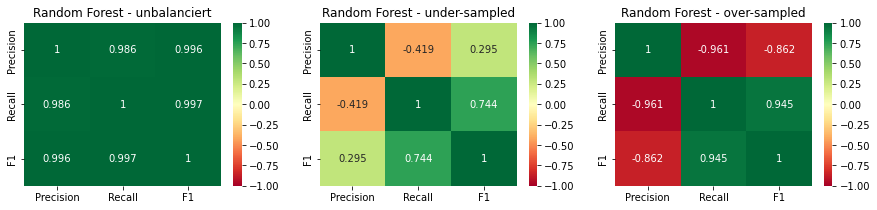

In [104]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,3))

sns.heatmap(rf_org_corr, annot = True, fmt = '.3g', cmap = 'RdYlGn', ax=ax1, vmin = -1, vmax = 1)
sns.heatmap(rf_rus_corr, annot = True, fmt = '.3g', cmap = 'RdYlGn', ax=ax2, vmin = -1, vmax = 1)
sns.heatmap(rf_ros_corr, annot = True, fmt = '.3g', cmap = 'RdYlGn', ax=ax3, vmin = -1, vmax = 1)
ax1.set_title('Random Forest - unbalanciert')
ax2.set_title('Random Forest - under-sampled')
ax3.set_title('Random Forest - over-sampled')

plt.show()

<a name="ausblick"></a>
## 9. Fazit und Ausblick

Zusammenfassend kann gesagt werden, dass der häufig zur Modellbewertung herangezogene Accuracy-Score allein wenig Aussagekraft besitzt und vor allem bei unbalancierter Datengrundlage die Genauigkeit des Modells nicht gut wiederspiegelt, da eine große Abweichung zum F1-Maß besteht.
Im Falle ausbalancierter Daten gibt der Accuracy-Score allerdings ein wesentlich besseres Bild der Modellqualität ab und entspricht dem F1-Score.

Betrachtet man die Ergebnisse auf den unbalancierten Daten ist erkennbar, dass mit steigender Anzahl der verfügbaren Trainingsdaten bei den einzelnen Kategorien auch die jeweilige Genauigkeit gesteigert werden kann. Precision- und Recall-Score sowie daraus resultierend das F1-Maß stehen hier in positiver Korrelation zueinander.


Die Klasse `without_mask` erreicht sowohl im Falle der Datenreduktion, als auch bei der Generierung zusätzlicher Daten relativ konstante Werte. Dies erscheint insofern nachvollziehbar, da sich die Pixelwerte zwischen einem Gesicht mit bzw. ohne Maske deutlich unterscheiden und daher wenig Nähe zu den beiden anderen Klassen besteht. Dies ermöglichte die Erzielung von durchgängig stabilen Trainingsergebnissen.
Zudem liegt die Kategorie `without_mask` bezogen auf die Anzahl vorhandener Datenpunkte zwischen den beiden anderen Kategorien. Das Under- sowie Over-Sampling war hier also nicht so extrem wie bei `with_mask` und `masked_weared_incorrect`.

Auffälig ist, dass bei den Klassen `with_mask` und `masked_weared_incorrect` sowohl beim Training der Modelle mit den under- als auch mit den over-sampled Daten Schwankungen bei den Messwerten Recall und Precision auftreten. Es bestehen hier negative Korrelationen zwischen den beiden Klassen, da der Algorithmus diese vermehrt verwechselt. Es entscheiden nur wenige Pixel zwischen einer korrekt getragenen Maske und einer falsch getragenen, sodass die Unterscheidung für die Modelle schwer erlernbar ist. Hinzu kommt, dass `with_mask` und `masked_weared_incorrect` in den vorhandenen Daten weit auseinander liegen und daher von Datenreduktion und -genierung stark betroffen sind. So verliert die Klasse `with_mask` einerseits viele Daten und damit wichtige Merkmale für das Training, während bei der Klasse `masked_weared_incorrect` viele künstlich erzeugten Datensätze für das Training verwendet wurden. Bei den unbalancierten Daten ist dieses Bild hingegen nicht erkennbar.


Welches der oben trainierten Modelle nun das Beste ist, lässt sich nicht genau festlegen. 
Die Wahl des Modells ist abhängig von der Aufgabe bzw. davon, welchem Lernerfolg mehr Bedeutung beigemessen wird.
Im Falle einer Gesichtsmaskenerkennung kann es ausreichend sein zu unterscheiden, ob eine Maske getragen wird oder nicht. Hierbei wäre der Random Forest auf den unbalancierten die Beste Wahl, da in den Klassen `with_mask` und `without_mask` die höchsten Scores erreicht werden. Die Klasse `masked_weared_incorrect` spielt nur eine untergeordnete Rolle.
Sollte die Aufgabenstellung allerdings sein zu erkennen, ob eine Maske korrekt getragen wird, spielen andere Kriterien eine Rolle. In diesem Fall erzielt der Random Forest, der auf die under-sampled Daten trainiert wurde, das beste Gesamtergebnis, da hier die Genauigkeit über alle Metriken hinweg am höchsten ist. Der under-sampled Decision Tree konnte durch die Ensemble-Bildung im Rahmen des Random Forest Algorithmus nochmals optimiert werden. 


Insgesamt erreicht jedoch keines der trainierten Modelle ein wirklich erfolgreiches Ergebnis. Es besteht noch ein großes Optimierungspotenzial bei der Vorhersagegenauigkeit.
Hierbei könnten unterschiedliche Ansätze verwendet werden. Es besteht die Möglichkeit, die verarbeiteten Bilder grundsätzlich vorab in Graustufen-Bilder umzuwandeln. Dadurch sinkt die Anzahl der Dimensionen bzw. Merkmale, was eine Verbesserung des Trainings herbeiführen kann.
Alternativ kann das Training mittels neuronale Netze und hierbei mit der CNN-Architektur (CNN = Convolutional Neuronal Netwerk) durchgeführt werden. Diese sogenannten Faltungsnetzwerke werden u.a. zur Bildklassifizierung eingesetzt und sind sehr effektiv. Ergänzt kann beim Einsatz eines neuronalen Netzes auch über den Einsatz eines Image Generators nachgedacht werden der dazu dient, durch kleine Abänderungen der Input-Bilder, bspw. Drehen oder Strecken, die Generalisierungfähigkeit eines Modells zu stärken. Wird zusätzlich die Regulierungstechnik Early-Stopping verwendet, um ein Overfitting des Netzwerks auf die Daten zu verhindern, ist eine deutlich erhöhte Vorhersagegenauigkeit erwartbar.

<a name="literatur"></a>
## 10. Literaturverzeichnis

[1] Larxel, _Face Mask Detection_, Link: https://www.kaggle.com/datasets/andrewmvd/face-mask-detection, 2020<br><br>
[2] Srishilesh, _Understanding PASCAL VOC Dataset_, Link: https://www.section.io/engineering-education/understanding-pascal-voc-dataset/Quelle, 2022<br><br>
[3] Sarthak Gupta, _Face Mask Detector_, Link: https://www.kaggle.com/code/sarthak02gupta/face-mask-detector, 2022<br><br>
[4] Aurélien Géron, _Praxiseinstieg Machine Learning mit Scikit-Learn, Keras und Tensorflow_, 2. Auflage, O'Reilly Verlag, 2020<br><br>
[5] Aakanksha, _Bounding Box Prediction from Scratch using PyTorch_, Link: https://towardsdatascience.com/bounding-box-prediction-from-scratch-using-pytorch-a8525da51ddc, 2020<br><br>
[6] Scikit-learn Developers, _Pixel importances with a parallel forest of trees_, Link: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances_faces.html, abgerufen: 2022<br><br>
[7] JR Kreiger, _Evaluating a Random Forest model_, Link: https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56, 2020<br><br>
[8] IBM Deutschland GmbH, _Was ist Computer Vision?_, Link: https://www.ibm.com/de-de/topics/computer-vision, abgerufen: 2022<br><br>
[9] Nithyashree V, _Image Classification using Machine Learning_, Link: https://www.analyticsvidhya.com/blog/2022/01/image-classification-using-machine-learning/, 2022<br><br>
[10] DelftStack, _Bild in Python in Graustufen konvertieren_, Link: https://www.delftstack.com/de/howto/python/convert-image-to-grayscale-python/, 2021<br><br>
[11] Geeks for Geeks, _Plotting multiple bar charts using Matplotlib in Python_, Link: https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/, 2021<br><br>
[12] Berthold Schulte, _Machine-Learning-Modelle bewerten – die Crux mit der Metrik_, Link: https://blog.codecentric.de/2019/07/machine-learning-modelle-bewerten-die-crux-mit-der-metrik/, 2019<br><br>
[13] Joydwip Mohajon, _Confusion Matrix for Your Multi-Class Machine Learning Model_, Link: https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826, 2020<br><br>
[14] Analytics Vidhya, _10 Techniques to deal with Imbalanced Classes in Machine Learning_, Link: https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/, 2022<br><br>
[15] Himanshu Tripathi, _What Is Balanced And Imbalanced Dataset?_, Link: https://medium.com/analytics-vidhya/what-is-balance-and-imbalance-dataset-89e8d7f46bc5, 2019<br><br>


